In [1]:
using Pkg
Pkg.activate(".")

Activating environment at `~/hypergraph-clustering/Project.toml`


In [ ]:
1 + 1

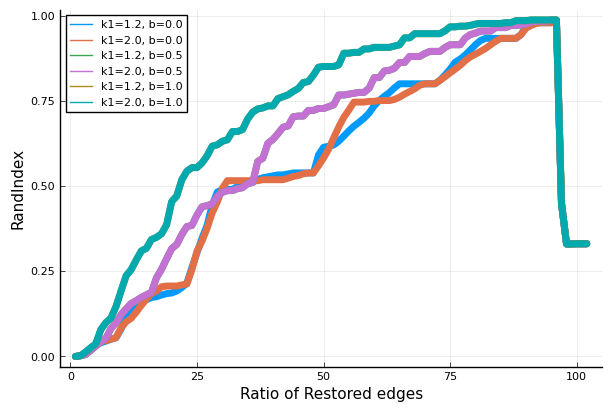

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [179]:
arr = load("./okapis.jld2")["scores2"]
label = []
for b in 0:0.5:1
    push!(label, "k1=1.2, b=$b")
    push!(label, "k1=2.0, b=$b")
end

f(x) = x[1:26:end]
arr = f.(arr)
Plots.plot(arr, lw=5, labels=permutedims(label), ylabel="RandIndex", xlabel="Ratio of Restored edges")
Plots.savefig("./data/iiWAS2020/rg1_randindex.eps")

In [36]:
# parr = []
# bps = []
tr_data = Set.([1:100, 101:200, 201:300, 301:400, 401:500])
# cfms = []
# jlbps = []

arr = []
for (i, rg) in enumerate([rg1, rg2, rg3, rg4])
    pyplot()
    cfm = CFModularityCNMLike(1000)
    @time bm, bp, hist = findcommunities(rg, cfm)
    for cluster in bp
        for node in cluster
            print(node, ' ')
        end
        println()
    end
    break
#     circle = [length(i) / sum(length.(bp)) for i in bp]
#     sort!(circle, rev=true)
#     Plots.pie(circle, label="")
#     Plots.bar(sort(length.(bp)[1:20], rev=true), yscale=:log10, xlabel="Cluster number", ylabel="Cluster size", label="")
#     Plots.savefig("./data/iiWAS2020/rg$i-cluster_size.eps")
end

  2.014746 seconds (11.08 M allocations: 497.755 MiB, 22.83% gc time)
288 11 491 134 215 464 158 160 29 131 249 478 300 173 499 74 477 435 176 57 31 285 490 70 33 479 445 165 114 96 133 473 49 84 489 117 93 425 50 77 80 474 188 441 132 195 157 412 447 430 221 153 401 217 79 71 120 154 76 184 167 204 484 143 414 287 107 169 122 21 62 416 10 294 102 180 162 129 280 88 429 413 149 439 5 463 63 472 438 41 245 15 461 148 495 55 66 462 239 155 150 95 139 90 111 14 483 253 256 258 175 200 265 452 172 492 146 135 130 65 17 125 202 44 250 37 453 419 466 192 436 110 475 127 13 450 270 99 137 141 105 1 30 47 214 91 203 9 43 128 147 470 104 244 183 468 103 152 38 488 465 118 48 100 411 81 140 291 422 196 19 268 281 51 243 454 191 177 424 123 446 427 485 163 405 276 108 164 329 2 89 197 136 151 144 142 78 159 494 448 112 407 459 106 433 121 109 182 26 298 138 4 457 235 168 440 94 115 54 418 40 101 455 171 60 34 417 481 299 467 178 426 198 272 493 482 469 295 293 113 242 12 410 189 246 297 16 471 45

In [15]:
include("./ClusteringUtil.jl")
function testmod2(h::Hypergraph, method::CFModularityCNMLike, fx)
    ha = SimpleHypergraphs.HypergraphAggs(h)
    best_modularity = 0
    comms = [Set(i) for i in 1:nhv(h)]
    mod_history = Vector{Float64}(undef, method.reps)
    for rep in 1:method.reps
        t = time()
        he = rand(1:nhe(h))
        vers = collect(keys(getvertices(h, he)))
        if length(vers) == 0
            continue
        end;
        c = deepcopy(comms)
        i0 = fx(c, vers)
        max_i = length(c)
        i_cur = i0
        while i_cur < max_i
            i_cur += 1
            if length(intersect(c[i_cur],vers)) > 0
                union!(c[i0], c[i_cur])
                c[i_cur]=c[max_i]
                max_i += -1
            end
        end
        println("connect", time()-t)
        resize!(c,max_i)
        t2 = time()
        m = my_mod(h, c)
        println("modularity", time()-t2)
        if m > best_modularity
            best_modularity = m
            comms = c
        end
        mod_history[rep] = best_modularity
        println("------")
    end
    return (bm=best_modularity, bp=comms, mod_history=mod_history)
end

p = [Set(1:nhv(youtube))]
@time my_mod(youtube, p)
@time my_mod(youtube, Set.(1:nhv(youtube)))
cfm = CFModularityCNMLike(10)
@time bm, bp, hist = testmod2(youtube, cfm, SimpleHypergraphs.find_first)

  0.242699 seconds (392.85 k allocations: 19.721 MiB, 4.02% gc time)
  1.611009 seconds (27.00 M allocations: 445.712 MiB, 26.32% gc time)
connect0.09841084480285645
modularity1.4315030574798584
------
connect0.07776784896850586
modularity1.0673398971557617
------
connect0.07926201820373535
modularity1.4348170757293701
------
connect0.08655405044555664
modularity1.0880889892578125
------
connect0.0819699764251709
modularity1.4177908897399902
------
connect0.07612395286560059
modularity1.0694339275360107
------
connect0.07395005226135254
modularity1.4089021682739258
------
connect0.08686089515686035
modularity1.0705759525299072
------
connect0.07811498641967773
modularity1.4056401252746582
------
connect0.0663909912109375
modularity1.069154977798462
------
 13.438174 seconds (270.62 M allocations: 4.481 GiB, 17.92% gc time)


(bm = 0.0019070647520803674, bp = Set{Int64}[Set([1]), Set([2]), Set([3]), Set([4]), Set([5]), Set([6]), Set([7]), Set([8]), Set([9]), Set([10])  …  Set([45285]), Set([45286]), Set([45287]), Set([45288]), Set([45289]), Set([45290]), Set([45291]), Set([45292]), Set([45293]), Set([45294])], mod_history = [2.9831449311474585e-5, 0.00010529357115915043, 0.00070826557863943, 0.0008591922114944865, 0.001010122903496764, 0.0011609279776404733, 0.0012363625201707133, 0.0013788309114620562, 0.0014542966752801802, 0.0019070647520803674])

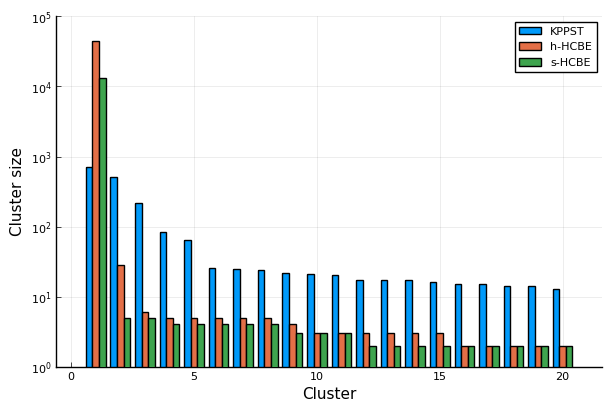

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [229]:
StatsPlots.groupedbar(hcat(x3[1:20], x1[1:20], x2[1:20]), yscale=:log10, ylabel="Cluster size", xlabel="Cluster", label=["KPPST" "h-HCBE" "s-HCBE"], ylims=(1,10^5))
StatsPlots.savefig("./data/iiWAS2020/youtube_cluster_bias.eps")

In [288]:
cfm = CFModularityCNMLike(1000)
bm, bp, hist = findcommunities(rg1, cfm)
# bp1 = zeros(20)
bp1 = sort(length.(bp), rev=true)

ms, ph, bp, ufh, score = clustering3(rg1, 1)
bp2 = zeros(20)
bp2[1:length(ph[end])] = sort(length.(ph[end]), rev=true)
# ms, ph, bcn, uf = he_clustering(rg1, 5)
# bp3 = zeros(20)
# p = epart2cluster(rg1, ph[end])
# prob_dists = calc_entropy(rg1, uf, p)
# circle = zeros(length(p))
# for (k, v) in prob_dists
#     circle .+= v
# end
# for i in 1:length(circle)
#     bp3[i] = circle[i]
# end


computing...100%|███████████████████████████████████████| Time: 0:00:01


1-element Array{Int64,1}:
 500

300 7
301 6
302 5
303 6
304 4
305 6
306 5
307 3
308 3
309 6
310 3
311 5
312 4
313 5
314 4
315 5
316 4
317 5
318 7
319 6
320 9
321 5
322 4
323 4
324 6
325 1
326 4
327 8
328 3
329 2
330 6
331 4
332 6
333 8
334 4
335 5
336 1
337 2
338 8
339 6
340 2
341 3
342 4
343 5
344 4
345 4
346 5
347 5
348 8
349 7
350 3


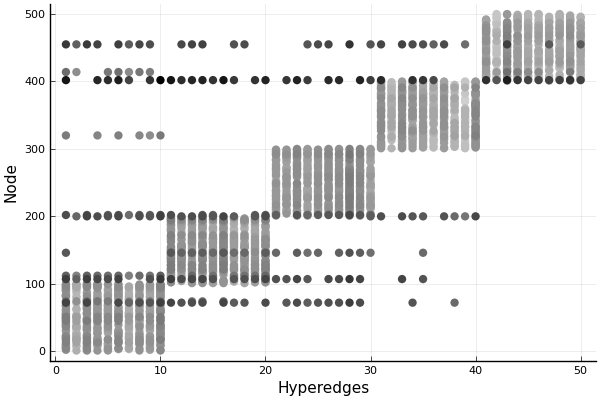

In [300]:
for i in 300:350
    println(i, ' ', length(gethyperedges(rg4, i)))
end
plot_incidence(rg4)

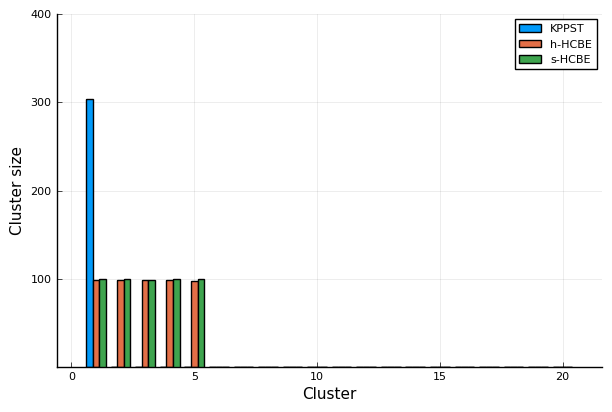

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [228]:
StatsPlots.groupedbar(hcat(bp1[1:20], bp2, bp3), xlabel="Cluster", ylabel="Cluster size", ylims=(1, 400), label=["KPPST" "h-HCBE" "s-HCBE"])
StatsPlots.savefig("./data/iiWAS2020/rg1_cluster_bias.eps")

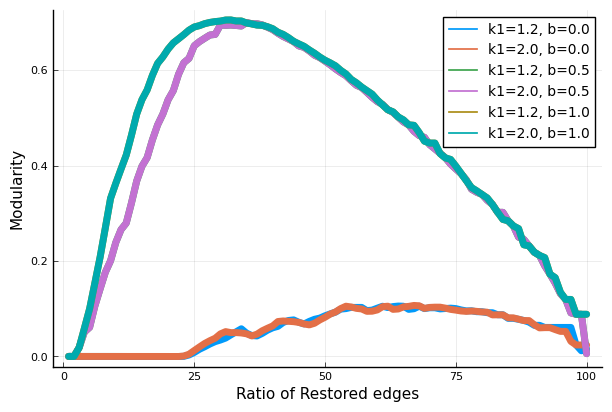

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [222]:
youtube_okapis = load("./youtube_okapis.jld2")["arr"]
label = []
for b in 0:0.5:1
    push!(label, "k1=1.2, b=$b")
    push!(label, "k1=2.0, b=$b")
end
# youtube_okapis[1], youtube_okapis[2] = youtube_okapis[2], youtube_okapis[1]
# youtube_okapis[3], youtube_okapis[4] = youtube_okapis[4], youtube_okapis[3]
# youtube_okapis[5], youtube_okapis[6] = youtube_okapis[6], youtube_okapis[5]
f(x) = x[1:1215:end]
youtube_okapis = f.(youtube_okapis)

Plots.plot(youtube_okapis, lw=5, labels=permutedims(label), xlabel="Ratio of Restored edges", ylabel="Modularity", legendfontsize=10)
Plots.savefig("./data/iiWAS2020/youtube_okapis.eps")

In [269]:
# bp = epart2cluster(youtube, ph[end])
# prob_dists = calc_entropy(youtube, uf, bp)
# circle = zeros(length(bp))
# for (k, v) in prob_dists
#     circle .+= v
# end
# pyplot()
# Plots.bar(sort(circle, rev=true)[1:20], xlabel="Cluster number", ylabel="Cluster size", label="", yscale=:log10)
# Plots.savefig("./data/iiWAS2020/youtube_cluster_bias_by_shcbe.eps")
# Plots.savefig("./data/iiWAS2020/luster_bias_by_shcbe.eps")
# sort(circle, rev=true)[21:end]
out = open("./p" , "w")
# ms, ph, bp, ufh, scores = clustering3(rg1, 11)
cfm = CFModularityCNMLike(1000)
bm, bp, hist = findcommunities(rg1, cfm)
for cluster in bp
    for node in cluster
        print(out, node, ' ')
    end
    println(out)
end
close(out)

In [203]:
for rg in [rg1, rg2, rg3, rg4]
    ms, ph, bp, ufh, scores = clustering3(rg, 1)
    score = scoring.(ph, Ref(tr_data), f1_score) 
    println(maximum(score))
end


computing...100%|███████████████████████████████████████| Time: 0:00:02


0.9878749463267017


computing...100%|███████████████████████████████████████| Time: 0:00:02


0.9716636197440585


computing...100%|███████████████████████████████████████| Time: 0:00:01


0.9777439526081948


computing...100%|███████████████████████████████████████| Time: 0:00:01


0.9819004524886877


In [263]:
# Plots.pie(length.(load("./youtube_jl.dat")["bp"]), label="")
# Plots.savefig("./")
bp = length.(load("./youtube_jl.dat")["bp"])
Plots.pie(bp, label="")
Plots.savefig("./data/iiWAS2020/youtube_cluster_bias.eps")
1

InterruptException: InterruptException:

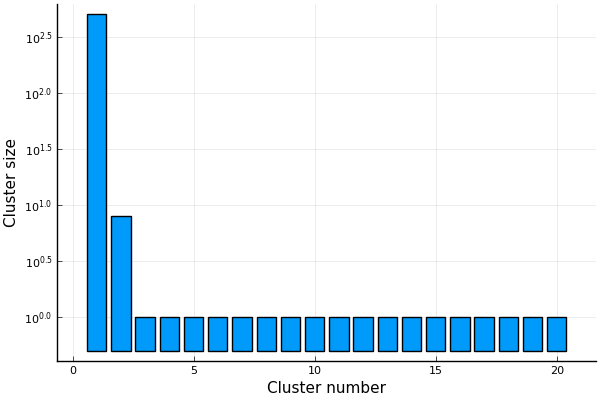

In [274]:
pyplot()
Plots.bar(sort(bp[1:20], rev=true), yscale=:log10, xlabel="Cluster number", ylabel="Cluster size", label="")
Plots.savefig("./data/iiWAS2020/youtube_cluster_bias.eps")

In [80]:
# # pyplot()
# StatsPlots.pyplot()
# groupedbar()
# StatsPlots.savefig("./test.eps")
cfm = CFModularityCNMLike(1000)
bm, jlbp, hist = findcommunities(rg1, cfm)
ms, ph, hbp, ufh, scores = clustering3(rg1, 1)
ms, eh, bcn, uf = he_clustering(rg1, 5)
bp = epart2cluster(rg1, eh[end])
prob_dists = calc_entropy(rg1, uf, bp)
circle = zeros(length(bp))
for (k, v) in prob_dists
    circle .+= v
end

jlbp = sort(length.(jlbp), rev=true)

hbp = sort(length.(hbp), rev=true)
sort!(circle, rev=true)

# groupedbar(hcat(length.(jlbp[1:20], hbp[1:20], circle[1:20])))

computing...100%|███████████████████████████████████████| Time: 0:00:01


5-element Array{Float64,1}:
 100.21303615999915
 100.19361640011152
 100.14713519899865
 100.04651218261917
  99.39970005827152

In [342]:
include("./HypergraphClustering.jl")
# arr = []
arr2 = []
for rg in [rg1, rg2, rg3, rg4]
#     ms, ph, bp, ufh, scores = clustering3(rg)
#     push!(arr, scores)
    cfm = CFModularityCNMLike(1000)
    bm, bp, hist = findcommunities(rg, cfm)
    push!(arr2, scoring(tr_data, bp, f1_score))
end
# Plots.plot(arr)

In [380]:
# arr2 = (a->[a for i in 1:length(arr[1])]).(arr2)
# Plots.plot(arr2)
# Plots.plot(arr2[1])
# f(x) = x[1:26:end]
# Plots.plot(f.(arr2), lw=5, labels=["Syn1" "Syn2" "Syn3" "Syn4"], xlabel="Ratio of Restored edges", ylabel="RandIndex")
arr2

4-element Array{Array{Float64,1},1}:
 [0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684  …  0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684, 0.42307089642597684]
 [0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223  …  0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223, 0.35065174531580223]
 [0.3504992265504148, 0.3504992265504148, 0.3504992265504148, 0.3504992265504148, 0.3504992265504148, 0.350499226

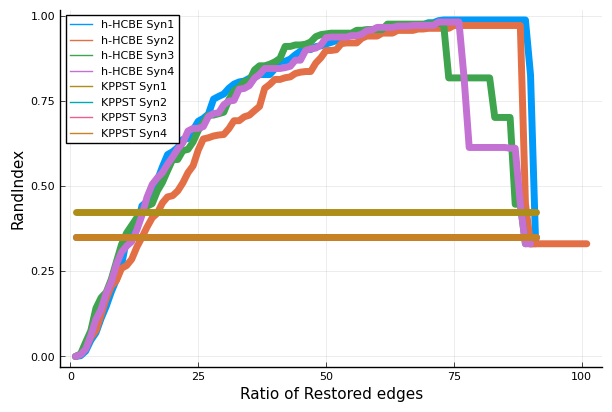

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [360]:

Plots.plot(vcat(f.(arr), f.(arr2)), lw=5, xlabel="Ratio of Restored edges", labels=["h-HCBE Syn1" "h-HCBE Syn2" "h-HCBE Syn3" "h-HCBE Syn4" "KPPST Syn1" "KPPST Syn2" "KPPST Syn3" "KPPST Syn4"], ylabel="RandIndex")
Plots.savefig("./data/iiWAS2020/randindex.eps")

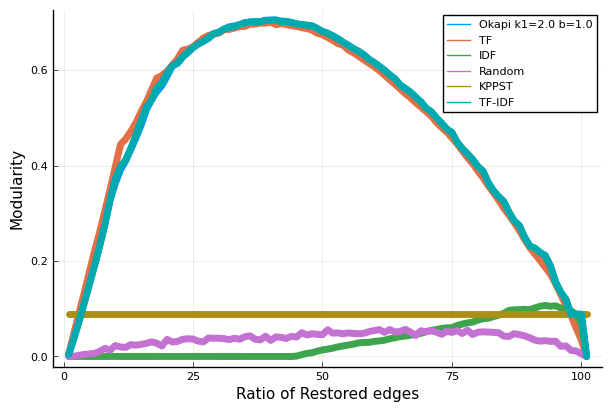

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [139]:
mods = []
push!(mods, load("./okapi_ms.jld2")["ms_hists"])
push!(mods, load("./tf_ms.jld2")["ms_hists2"])
push!(mods, load("./idf_ms.jld2")["ms_hists"])
push!(mods, load("./random_ms.jld2")["ms_hists"])
push!(mods, [0.089 for i in 1:length(mods[1])])
push!(mods, load("./tfidf_ms.jld2")["ms_hists"])
pyplot()
reverse!.(mods)
Plots.plot(mods, lw=5, label=["Okapi k1=2.0 b=1.0" "TF" "IDF" "Random" "KPPST" "TF-IDF"], xlabel="Ratio of Restored edges", ylabel="Modularity", colors=["red" "red" "red" "red" "red" "red"])
Plots.savefig("./data/iiWAS2020/youtube_mods.eps")

In [99]:
Plots.plots(mods)

UndefVarError: UndefVarError: plots not defined

In [3]:
include("./src/HCBE.jl")

┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/SimpleHypergraphs/rB8ho.ji for SimpleHypergraphs [aa4a32ff-dd5d-5357-90e3-e7a9512f0501]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/ScikitLearn/tbUuI.ji for ScikitLearn [3646fa90-6ef7-5e7e-9f22-8aca16db6324]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/GraphPlot/bUwXr.ji for GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1240


txt2h (generic function with 1 method)

In [8]:
rg1 = txt2h("./data/txt/rg.txt")
rg2 = txt2h("./data/txt/rg2.txt")
rg3 = txt2h("./data/txt/rg3.txt")
rg4 = txt2h("./data/txt/rg4.txt")
youtube = build_youtube()
cookpad = build_trimcookpad()
sam = build_sample()
# # amazon = build_amazon()
# jsai = load("../jsai_base/jsais.jld2")
# mat = load("../jsai_base/mat.jld2")
tr_data = Set.([1:100, 101:200, 201:300, 301:400, 401:500])

┣   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱ ┫ 13252it 00:01 [22245.5 it/s]
┣  ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱  ┫ 54813it 00:02 [25330.5 it/s]


5-element Array{Set{Int64},1}:
 Set([2, 89, 11, 29, 74, 57, 31, 78, 70, 33  …  98, 19, 51, 22, 6, 24, 73, 53, 23, 27, 56])                       
 Set([197, 134, 158, 136, 160, 151, 131, 144, 142, 173  …  161, 186, 119, 191, 156, 177, 116, 123, 163, 108, 164])
 Set([288, 241, 215, 249, 207, 300, 289, 201, 283, 285  …  273, 291, 268, 281, 243, 222, 277, 271, 255, 218, 276])
 Set([329, 306, 370, 365, 391, 400, 342, 384, 375, 318  …  321, 378, 389, 312, 317, 358, 305, 315, 322, 349, 301])
 Set([491, 464, 478, 499, 477, 435, 494, 448, 490, 407  …  415, 420, 454, 423, 424, 427, 446, 485, 498, 405, 496])

In [19]:
# include("/home/C0117035/.julia/packages/SimpleHypergraphs/5oRQZ/src/SimpleHypergraphs.jl")
# @time my_mod(youtube, Set.(1:nhv(youtube)))
# cfm = CFModularityCNMLike(1)
]st
@time findcommunities(rg1, cfm)
findcommunities()

  0.010071 seconds (30.86 k allocations: 1.440 MiB)


MethodError: MethodError: no method matching findcommunities()
Closest candidates are:
  findcommunities(!Matched::Hypergraph, !Matched::CFModularityRandom; mod_f) at /home/C0117035/.julia/packages/SimpleHypergraphs/5oRQZ/src/algorithms/community/modularity.jl:103
  findcommunities(!Matched::Hypergraph, !Matched::CFModularityCNMLike) at /home/C0117035/.julia/packages/SimpleHypergraphs/5oRQZ/src/algorithms/community/modularity.jl:176
  findcommunities(!Matched::Hypergraph, !Matched::CFLabelPropagationFinder) at /home/C0117035/.julia/packages/SimpleHypergraphs/5oRQZ/src/algorithms/community/label-propagation.jl:37

In [202]:
jsai_max = jsai["jsai_max"]
max_num2name = jsai["max_num2name"]
max_name2num = jsai["max_name2num"]
name2num = jsai["name2num"]
num2name = jsai["num2name"]
jsai = jsai["jsai"]

2014×853 Hypergraph{Int64,Nothing,Nothing,Dict{Int64,Int64}}:
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing   

In [130]:
cfm = CFModularityCNMLike(1000)
bm, bp, hist = findcommunities(rg1, cfm)
scoring(tr_data, bp, f1_score)

0.37177598903921905

0.35166612492206195


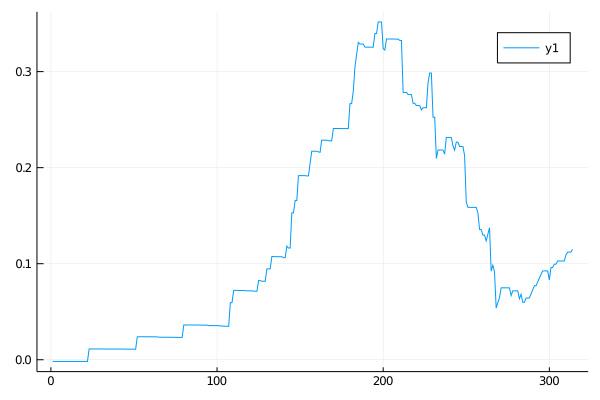

In [318]:
include("HypergraphClustering.jl")
ms, ph, bp, ufh = clustering3(jsai_max, 10, modularity, random_weight)
println(maximum(ms))
Plots.plot(ms)

In [8]:
mat = [[0. for j in 1:nhv(jsai)] for i in 1:nhv(jsai)]
l = length(build_bg(jsai, random_weight))

for j in 1:100
    ms, ph, bp, ufh = clustering3(jsai, 1, modularity, random_weight)
    @showprogress for node1 in 1:nhv(jsai)
        for node2 in 1:nhv(jsai)
            if node1 == node2 continue end
            for (i, ufa) in enumerate(ufh)
                uf = UnionFind(nhv(jsai)+nhe(jsai))
                uf.parent = copy(ufa)
                if issame(uf, node1, node2)
                    mat[node1][node2] += (l-i)/l
                    break
                end
            end
        end
    end
end

# mat = load("../jsai_base/mat.jld2")["mat"]
# a = mat ./ 100

computing...100%|███████████████████████████████████████| Time: 0:02:16
Progress:   2%|▉                                        |  ETA: 2 days, 2:54:27m

InterruptException: InterruptException:

In [10]:
# a ./= 2
# a
# g = Hypergraph{Int64}(nhv(jsai_max), 0)
# for (i, v) in enumerate(a)
#     for j in i+1:nhv(jsai_max)
#         r = rand(1)[1]
# #         push!(rs, r)
#         if r < a[i][j]
# #             println(r, ' ', a[i][j])
#             he = Dict([i=>1, j=>1])
#             add_hyperedge!(g, vertices=he)
#         end
#     end
# end

# get_connected_components(g)
# t = TwoSectionView(g)
# gplot(t)
g

UndefVarError: UndefVarError: g not defined

In [279]:
ms, eph, bcn, uf = he_clustering(jsai_max,20)
eph[end]
node_cluster = epart2cluster(jsai_max, eph[end])

prob_dist = calc_entropy(jsai_max, uf, node_cluster)
# println(prob_dist[42])
c = [Set([]) for i in 1:20]
for (node, v) in prob_dist
    for i in 1:length(v)
        if v[i] == 0 continue end
        push!(c[i], (max_name_d[node], v[i]))
    end
end

# # println(num2name[30])
# sort!.(c, by=i->i[1])
# for i in eph[end]
#     println(length(i))
#     println()
# end

26

18

6

4

3

2

2

2

2

2

1

1

1

1

1

1

1

1

1

1



computing...100%|███████████████████████████████████████| Time: 0:00:55


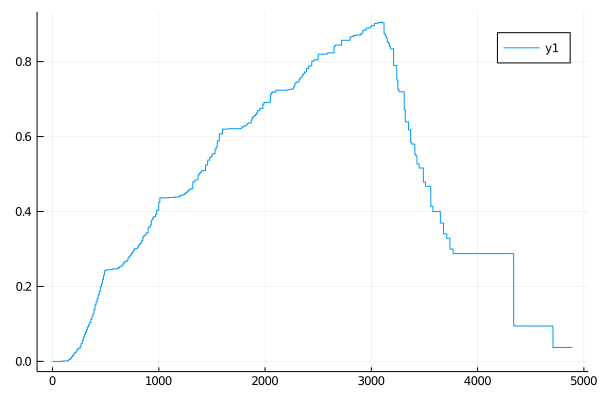

In [237]:
ms, eph, bp, uf = clustering3(jsai, 1, freq=10)
Plots.plot(ms)

In [270]:
include("./ClusteringUtil.jl")
for (k, v) in prob_dist
    if avg_entropy(v) != 0.0
        println(max_name_d[k])
        println(length(gethyperedges(jsai_max, k)))
        println(k, ' ', avg_entropy(v),' ', v)
    end
end
# max_name_d[11]

小川哲司
4
11 0.25097528899416316 [0.0, 0.0, 0.0, 0.0, 0.0, 0.19148936170212766, 0.8085106382978723]
伊藤春海
2
29 0.3458595800715595 [0.0, 0.6000000000000001, 0.0, 0.4, 0.0, 0.0, 0.0]
藤本真一
2
176 0.3458595800715595 [0.0, 0.6000000000000001, 0.0, 0.4, 0.0, 0.0, 0.0]
小澤順
6
31 0.28533289929982913 [0.8366013071895425, 0.09803921568627452, 0.0, 0.06535947712418301, 0.0, 0.0, 0.0]
岡夏樹
4
107 0.22704200819575338 [0.8387096774193549, 0.0, 0.16129032258064516, 0.0, 0.0, 0.0, 0.0]
小林一郎
13
41 0.1888328818896491 [0.12026458208057728, 0.0, 0.0, 0.0, 0.8797354179194228, 0.0, 0.0]
清野正樹
2
175 0.3458595800715595 [0.0, 0.6000000000000001, 0.0, 0.4, 0.0, 0.0, 0.0]
田中雅人
2
30 0.3458595800715595 [0.0, 0.6000000000000001, 0.0, 0.4, 0.0, 0.0, 0.0]
木村浩彦
2
177 0.3458595800715595 [0.0, 0.6000000000000001, 0.0, 0.4, 0.0, 0.0, 0.0]
近藤堅司
2
178 0.3458595800715595 [0.0, 0.6000000000000001, 0.0, 0.4, 0.0, 0.0, 0.0]
安達登志樹
2
179 0.3458595800715595 [0.0, 0.6000000000000001, 0.0, 0.4, 0.0, 0.0, 0.0]
小林哲則
6
3 0.15031961707707936 [0

In [28]:
# # cfm = CFModularityCNMLike(1000)
# # @time a,b,c = findcommunities(jsai_max, cfm)
# # println(maximum(c))
# # println(length(b), ' ', b)
# for i in b
#     s = Set([])
#     for j in i
#         union!(s, num2word[j])
#     end
#     println(s)
#     println()
# end
# # Plots.plot(c)

Set(Any["施工品質", "Conditional StyleGAN", "ボイスユーザーインターフェース", "行動科学", "変分オートエンコーダ", "ナレッジグラフ", "説明可能性", "レビュー", "CTR予測", "育児", "アンサンブル学習", "エージェントシミュレーション", "キャラクターAI", "多層ネットワーク", "心拍変動", "ニューラルネットワーク", "社会実装", "人工知能", "クラウドソーシング", "確率モデリング", "砂防", "人-エージェント間インタラクション", "多変量統計的プロセス管理", "スペーシャルAI", "画像解析", "スタイルミックス", "シーングラフ", "強化学習", "画像生成", "グラフ研磨", "推論", "店頭実験", "教師データ選別", "説得", "バーチャルデータ", "表現学習", "深層強化学習", "テキスト分類", "画像認識", "音声書き起こし", "管理システム", "深層学習", "ファジィ推論", "発症予測", "不完全情報ゲーム", "子ども虐待", "コンクリート", "共創的適応環境", "ニュース見出し", "人工市場シミュレーション", "個体学習", "エッジ デバイス", "地形判読", "パターン認識", "霊長類", "自然勾配ブースティング", "熱中症検知", "極大クリーク", "社会学習", "持続可能な開発目標", "ロボット", "土木技術", "データマイニング", "教師無し二重分節", "言語獲得", "認知バイアス", "データサイエンティスト育成", "時系列", "物語自動生成", "メタAI", "可視化", "リカレントニューラルネットワーク ", "選曲システム", "情報推薦", "購買履歴データ", "投資", "Microclimate, Multi-grid, Sensors, Optimal control, Greenhouse", "特徴量マップの解像度", "身体動作", "異常検知", "動的連携モデル", "周辺抑制機構", "ゲーム自動生成", "機械学習", "ゲーム", "クラスタリング", "時系列分節化", "医療情報", "音声処理", "ダンジョン自動生成"

In [225]:
tfidf_m = load("./tfidf_ms.jld2", "ms_hists")
okapi_m = load("./okapi_ms.jld2", "ms_hists")
# tf_m = load("./tf_ms.jld2", "ms_hists")
idf_m = load("./idf_ms.jld2", "ms_hists")
random_m = load("./random_ms.jld2", "ms_hists")
notlog_idf_m = load("./tf_ms.jld2", "ms_hists2")
arr = []
push!(arr, tfidf_m)
push!(arr, okapi_m)
push!(arr, notlog_idf_m)
push!(arr, idf_m)
push!(arr, random_m)

arr = reverse.(arr)

5-element Array{Array{Any,1},1}:
 [0.003803305086140506, 0.03798933787677544, 0.07391104455752981, 0.11239852328202009, 0.15179148773163953, 0.19133522827590616, 0.23253880524608175, 0.27804267015333994, 0.3281478940878022, 0.37228636151392697  …  0.21836450468636467, 0.2117891105627221, 0.18981939059673442, 0.1563373433020356, 0.13463900382145097, 0.11949798417300093, 0.0884131689994954, 0.08840512610346883, 0.08838477787393662, 0.0]                          
 [0.003803305086140506, 0.03798933787677544, 0.07391104455752981, 0.11239852328202009, 0.15179148773163953, 0.19133522827590616, 0.23253880524608175, 0.27804267015333994, 0.3281478940878022, 0.3628555162880408  …  0.21179719033355252, 0.2117891105627221, 0.18981939059673442, 0.1563373433020356, 0.13463900382145097, 0.11949798417300093, 0.0884131689994954, 0.08840512610346883, 0.08838477787393662, 0.0]                           
 [0.005388027567362677, 0.048025859329554894, 0.09096507554715044, 0.13360155929524184, 0.1774433315687

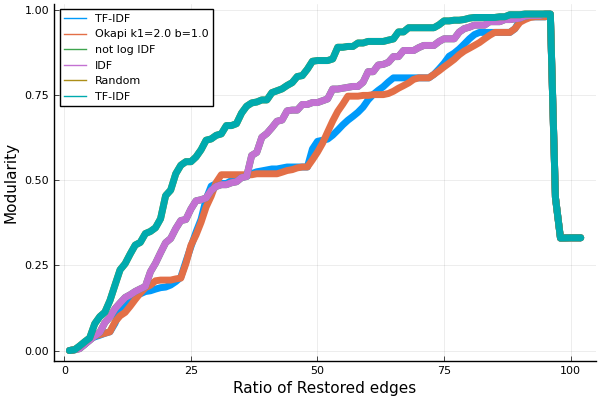

In [223]:
Plots.plot(arr, label=["TF-IDF" "Okapi k1=2.0 b=1.0" "not log IDF" "IDF" "Random"], lw=5, xlabel="Ratio of Restored edges", ylabel="Modularity")
# Plots.savefig("./youtube_modularity.eps")

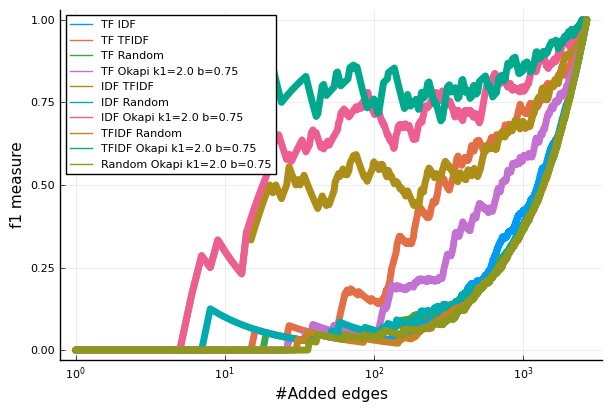

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [204]:
pyplot()
Plots.plot(cs, label=permutedims(plot_names), lw=5, xlabel="#Added edges", ylabel="f1 measure", xscale=:log10)
Plots.savefig("./images/youtube_log_curve.eps")

In [7]:
w = build_bg(rg, tfidf)
function comp(x, y)
    if(x.from == y.from) return x.to < y.to end
    return x.from < y.from
end


w = [i.weight for i in sort(w, lt=comp)]
w = round.(w, digits=2)

2759-element Array{Float64,1}:
 0.06
 0.06
 0.07
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 ⋮   
 0.07
 0.06
 0.06
 0.07
 0.06
 0.07
 0.08
 0.07
 0.07
 0.06
 0.09
 0.06

In [28]:
b = BipartiteView(rg)
bv = LightGraphs.SimpleGraph(b)

c = vcat(["orange" for i in 1:nhv(rg)], ["lightseagreen" for i in 1:nhe(rg)])
labels = vcat(string.("v", string.(1:nhv(rg))), string.("he", string.(1:nhe(rg))))

# gplot(bv, nodelabel=labels, nodefillc=c, edgelabel=w)

550-element Array{String,1}:
 "v1"  
 "v2"  
 "v3"  
 "v4"  
 "v5"  
 "v6"  
 "v7"  
 "v8"  
 "v9"  
 "v10" 
 "v11" 
 "v12" 
 "v13" 
 ⋮     
 "he39"
 "he40"
 "he41"
 "he42"
 "he43"
 "he44"
 "he45"
 "he46"
 "he47"
 "he48"
 "he49"
 "he50"

[1.0, 1.0, 1.0, 0.9857167869730197, 0.9857167869730197, 0.9718581772858274, 0.9718581772858274, 0.9718581772858274, 0.9718581772858274, 0.9718581772858274, 0.9718581772858274, 0.9584015266595286, 0.9584015266595286, 0.9453258382439096, 0.9453258382439096, 0.936662859061233, 0.9326116109503727, 0.9326116109503727, 0.9326116109503727, 0.9228763368872367, 0.9228763368872367, 0.9228763368872367, 0.9228763368872367, 0.9228763368872367, 0.9202407045171567, 0.9202407045171567, 0.9202407045171567, 0.9202407045171567, 0.9202407045171567, 0.9202407045171567, 0.9202407045171567, 0.9202407045171567, 0.9202407045171567, 0.9120834068565148, 0.9094936990819193, 0.9094936990819193, 0.9094936990819193, 0.9094936990819193, 0.9094936990819193, 0.9094936990819193, 0.9094936990819193, 0.9094936990819193, 0.908196219166561, 0.908196219166561, 0.908196219166561, 0.8964933525429689, 0.8964933525429689, 0.8964933525429689, 0.8964933525429689, 0.8964933525429689, 0.8964933525429689, 0.8964933525429689, 0.896493

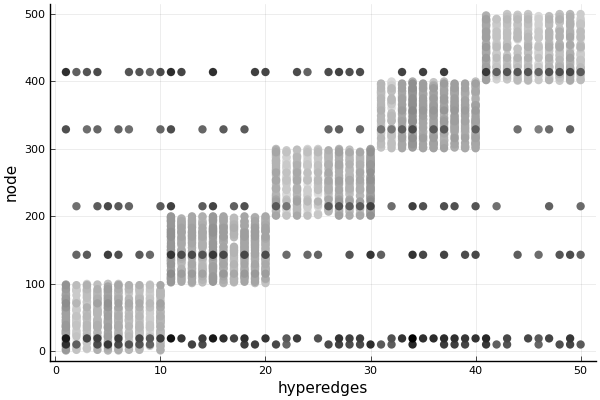

In [33]:
include("ClusteringUtil.jl")
plot_incidence(rg1, "", tfidf)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.969548016035013, 0.969548016035013, 0.969548016035013, 0.969548016035013, 0.969548016035013, 0.969548016035013, 0.969548016035013, 0.969548016035013, 0.969548016035013, 0.969548016035013, 0.969548016035013, 0.969548016035013]


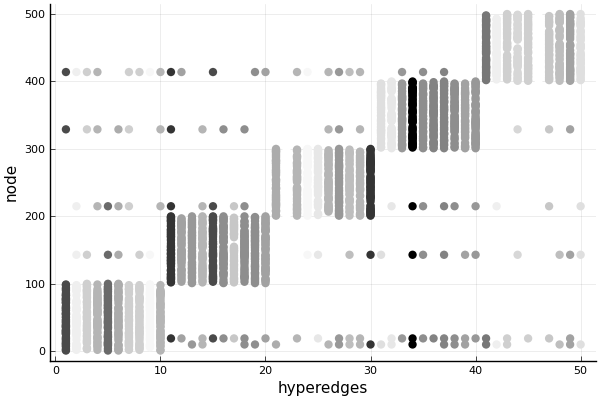

In [32]:
include("ClusteringUtil.jl")
plot_incidence(rg1, "", transpose_idf)

computing...100%|███████████████████████████████████████| Time: 0:00:01


  2.515557 seconds (14.37 M allocations: 551.145 MiB, 35.87% gc time)


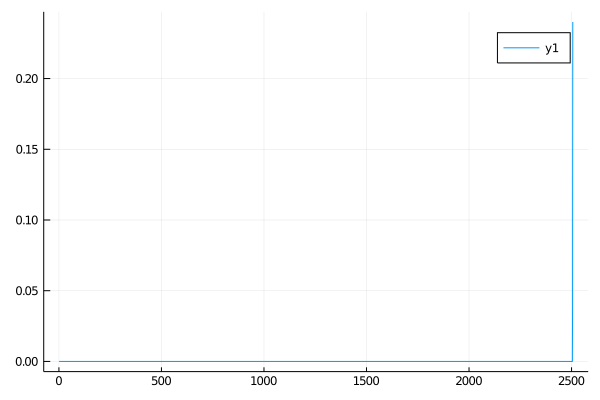

In [101]:
include("./HypergraphClustering.jl")
@time ms, ph, eph, bcn, uf = clustering3(rg1, 3, my_mod, freq=1)
Plots.plot(ms)

In [97]:
include("./ClusteringUtil.jl")
tmp = epart2cluster(rg1, eph[end])
function f()
    tmp::Array{Set{Int64}} = Array(Set.([1:100, 101:500]))
    return tmp
end

f()
println(modularity(rg1, f()))
my_mod(rg1, f())

# for i in tmp
#     println(i)
# end


# println(typeof(epart2cluster(rg1, eph[end])))
# println(typeof(randompartition(rg1,5)))

0.03999151567425021


0.03999151567425021

In [255]:
include("./HypergraphClustering.jl")
@time ms, ph, eph, bcn, uf = he_clustering(youtube, 100, freq=100)
bcn

StackOverflowError: StackOverflowError:

In [107]:
include("./HypergraphClustering.jl")
@time ms, ph, eph, bcn, uf = he_clustering(rg1, 5, freq=1)
eph[end]

1263
  1.865160 seconds (4.66 M allocations: 361.614 MiB, 33.34% gc time)


5-element Array{Set{Int64},1}:
 Set([543, 549, 542, 546, 545, 544, 548, 547, 550, 541])
 Set([536, 538, 532, 535, 531, 537, 540, 533, 534, 539])
 Set([510, 502, 505, 504, 506, 509, 501, 507, 503, 508])
 Set([512, 515, 517, 513, 518, 511, 520, 514, 516, 519])
 Set([529, 524, 522, 528, 521, 527, 523, 525, 526, 530])

In [109]:
include("./ClusteringUtil.jl")
# s = Set()
# # for i in uf.parent
# for i in nhv(rg1)+1:nhv(rg1)+nhe(rg1)
#     println(i)
#     push!(s, root(uf, i))
# end
# println(length(s))
# s
    
ent = calc_entropy(rg1, uf, epart2cluster(rg1, eph[end]))

avg_ent = avg_entropy.(values(ent))
sort!(avg_ent, rev=true)

500-element Array{Real,1}:
 0.9957348577460438
 0.9950099383631111
 0.9816134760862749
 0.981421776889435 
 0.9719346128522501
 0.9423991465666557
 0                 
 0                 
 0                 
 0                 
 0                 
 0                 
 0                 
 ⋮                 
 0                 
 0                 
 0                 
 0                 
 0                 
 0                 
 0                 
 0                 
 0                 
 0                 
 0                 
 0                 

In [123]:
include("./ClusteringUtil.jl")
modularity(rg1, prob_dist2part(ent))

-1.0373165594482668e-32

In [100]:
for cluster in 1:length(ent)
    count = 0
    for node in 1:nhv(youtube)
        count += ent[node][cluster]
    end
    println(count)
end

4.998336660013306
1.9998667288598653
1.9993339993339994
1.9993339993339994
1.9993339993339994
1.9990986931050023
10.996993720081903
1415.3019118693928
1.9993339993339994
42843.621564415094
1.9993339993339994
2.9990013315579227
1.9993339993339994
2.9990013315579227
4.996673320026614
2.9986486486486488
5.998668885191348
4.999692504804612
1.9990986931050023
1.9993339993339994
1.9990986931050023
2.9990013315579227
2.9993339993339996
1.9993339993339994
7.9964044943820225
13.997009966777409
2.9990013315579227
5.998336660013306
1.9993339993339994
2.9980026631158454
1.9993339993339994
2.9990013315579227
1.9990986931050023
1.998433892040897
4.999511550808979
1.9981973862100044
1.9990986931050023
2.9992005862367597
1.9993339993339994
1.9993339993339994
27.991410637594978
3.9986688851913477
6.996852517985611
4.998224786157263
1.999098286744815
1.9993339993339994
1.9993339993339994
3.9990013315579227
4.99960029311838
3.9995004163197336
3.9990013315579227
1.999333777481679
1.9993339993339994
1.9993

BoundsError: BoundsError: attempt to access 95-element Array{Float64,1} at index [96]

In [88]:
for i in 1:nhv(youtube)
    if 1 in ent[i] continue end
    count = length(ent[i][ent[i] .!= 0])
    if count >= 3 println(ent[i]) end
#     for j in ent[i]
#         if j != 0 && j <= 0.8 && j >= 0.2
#             println(ent[i])
#             break
#         end
#     end
#     if !(0.0 in ent[i]) println(sort(ent[i],rev=true)) end
end


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001342293414442125, 0.0, 0.9996840736564475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018169700210829125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00019358888645269493, 0.0, 0.9995443631892151, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [6]:
include("./ClusteringUtil.jl")
bg = build_bg(rg, tfidf)
function comp(x, y)
    if(x.from == y.from) return x.to < y.to end
    return x.from < y.from
end

w = [round(i.weight,digits=2) for i in sort(bg, lt=comp)]

2759-element Array{Float64,1}:
 0.06
 0.06
 0.07
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 ⋮   
 0.07
 0.06
 0.06
 0.07
 0.06
 0.07
 0.08
 0.07
 0.07
 0.06
 0.09
 0.06

In [59]:
# s = Set([])
jsai = Hypergraph{Int64}(2014, 0)

function rep_f(name)
#     println(typeof(name))
    name = replace(name, " "=>"")
    name = replace(name, "　"=>"")
    name = replace(name, ","=>"")
    name = replace(name, "○"=>"")
    return name
end
num2word = [[] for i in 1:length(num2name)]
name2word = Dict([i=>[] for i in keys(name2num)])
he2word = [Set() for i in 1:853]
he_i = 1

@showprogress for year in 2009:2020
    fname = "../jsai_base/jsai$year.json"
    data = JSON.parsefile(fname)
    for (k, v) in data
        he::Dict{Int64, Int64} = Dict([])
        if v["category"] != "一般セッション" continue end
        if haskey(v, "author")
            name = rep_f(v["author"])    
            push!(s, name) 
            he[name2num[name]] = 1
            if !haskey(v, "keywords") continue end
            for word in v["keywords"]
                push!(num2word[name2num[name]], word)
                push!(name2word[name], word)
                push!(he2word[he_i], word)
            end
        end
        if haskey(v, "co-author")
            for name in v["co-author"]
                name = rep_f(name)
                push!(s, rep_f(name))
                he[name2num[rep_f(name)]] = 1
                if !haskey(v, "keywords") continue end
                for word in v["keywords"]
                    push!(num2word[name2num[name]], word)
                    push!(name2word[name], word)
                    push!(he2word[he_i], word)
                end
            end
            
        end
        add_hyperedge!(jsai, vertices=he)
        global he_i += 1
    end   
end
# # name2num = Dict([name=>i for (i, name) in enumerate(s)])
# # num2name = Dict([i=>name for (i, name) in enumerate(s)])
he2word

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


853-element Array{Set{Any},1}:
 Set(["マルチラベル伝搬", "二部ネットワーク", "コミュニティ抽出"])                     
 Set(["データマイニング", "購買履歴データ", "店頭実験"])                          
 Set(["感情推定"])                                                 
 Set(["最適解探索", "量子コンピューティング"])                                 
 Set(["推薦システム", "対話システム", "深層強化学習"])                           
 Set(["知識構造化", "手続き的知識", "領域オントロジー", "ギター奏法オントロジー"])           
 Set(["Wasserstein距離", "深層学習", "ドメイン汎化"])                      
 Set(["畳み込みニューラルネットワーク", "YOLOv3", "病変部位検出", "CT画像"])          
 Set(["時系列データ", "模倣学習", "強化学習", "報酬設計"])                       
 Set(["異常検知", "正常モデル", "胸部Ｘ線写真", "解剖学的構造"])                    
 Set(["スロットフィリング", "系列ラベリング", "言語モデル", "ディリクレ過程"])             
 Set(["CNN", "サケ", "雌雄判別"])                                    
 Set(["信頼", "ゲーム理論", "人工知能", "価値共有"])                          
 ⋮                                                             
 Set(["深層学習", "画像認識", "Mask R-CNN"])                           
 Set(["vi

In [218]:
max_components = sort!(get_connected_components(jsai), rev=true, by=i->length(i))[1]
he_s = Set([])
max_d = Dict([])

max_he2word = [Set() for i in 1:77]
jsai_max = Hypergraph{Int64}(length(max_components), 77)
for (i, node) in enumerate(max_components)
    max_d[node] = i
#     max_name_d[max_num2name[node]] = num_d[node]
    hes = keys(gethyperedges(jsai, node))
    for he in hes
#         union!(max_he2word[he_d[he]], he2word[he])
        jsai_max[max_d[node], he_d[he]] = 1
    end
    push!.(Ref(he_s), hes)
end

# he_d = Dict(v=>i for (i, v) in enumerate(he_s))


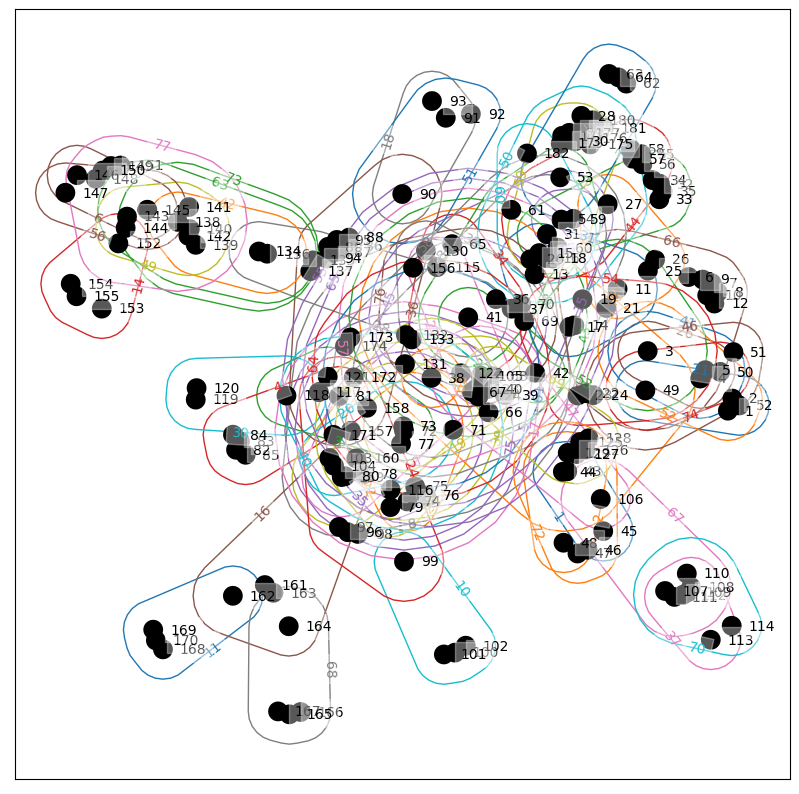

In [221]:
SimpleHypergraphs.draw(jsai_max, HyperNetX)

In [89]:
# labels = Dict([max_d[i]=>num_d[i] for i in max_components])
# SimpleHypergraphs.draw(jsai_max, HyperNetX, node_labels=labels)
@save "../jsai_base/jsais.jld2" jsai num2name name2num jsai_max max_num2name max_name2num num2word name2word he2word max_he2word

In [34]:
include("./HypergraphClustering.jl")
ms, ph, bp, uf = clustering3(jsai_max, 1)
# println(maximum(ms))
# Plots.plot(ms)
# for i in bp
#     s = Set()
#     for j in i
#         union!(s, num2word[j])
#     end
#     println(s)
#     println()
# end


7-element Array{Set{Int64},1}:
 Set([134, 158, 136, 160, 151, 131, 144, 142, 173, 31  …  98, 140, 174, 161, 119, 156, 116, 123, 163, 108, 164])
 Set([89, 46, 85, 55, 42, 58, 59, 74, 95, 57  …  81, 62, 51, 88, 73, 92, 53, 72, 63, 56, 41])                   
 Set([2, 11, 7, 9, 25, 8, 3, 20, 14, 12  …  17, 22, 6, 24, 4, 5, 23, 13, 27, 15, 1])                            
 Set([178, 177, 179, 29, 175, 176, 30])                                                                         
 Set([180])                                                                                                     
 Set([181])                                                                                                     
 Set([28])                                                                                                      

In [35]:
include("./HypergraphClustering.jl")
ms, eph, bcn, uf = he_clustering(jsai_max, 7) 
epart2cluster(jsai_max, eph[end])
modularity(jsai_max, epart2cluster(jsai_max, eph[end]))

0.8782144793225832

In [91]:
eph[end]
for i in eph[end]
    s = Set()
    for he in i
#         println( max_he2word[he-nhv(jsai_max)])
        union!(s, max_he2word[he-nhv(jsai_max)])
    end
    println(s)
    println()
end

Set(Any["Conditional StyleGAN", "物体概念", "マルチモーダル学習", "コミュニケーション", "勾配積分法", "視覚的説明", "Forward filtering-Backward sampling", "解釈性", "人工知能", "転移学習", "アニマシー知覚", "記号創発ロボティクス", "概念形成", "スタイルミックス", "Semantic-ICP", "脳波", "言語理解", "エンコーダデコーダネットワーク", "画像生成", "強化学習", "ヒューマンエージェントインタラクション", "マルチモーダル言語生成", "ドローン", "生成モデル", "セマンティックマッピング", "推意", "マルチエージェント", "没入型仮想現実", "複合現実", "表現学習", "Gaussian Process-Hidden Semi-Markov Model", "マルチモーダル", "模倣学習", "マルチモーダルトピックモデル", "Self-Attention", "ヒューマンロボットインタラクション", "データ拡張", "確率推論", "インタラクション", "深層学習", "発症予測", "Variational Autoencoder", "プランニング", "認知モデル", "ICP", "Gaussian process-hidden semi-Markov model (GP-HSMM)", "確率的生成モデル", "教師なし学習", "霊長類", "ロボティクス", "場所概念", "確率モデル", "ロボット", "説明性", "生活支援ロボット", "役割分担", "教師無し二重分節", "言語獲得", "確率的論理プログラミング", "深層生成モデル", "ベビーカー", "ウェアラブルセンサ", "副詞の意味", "物体検出", "同時学習", "Residual Reinforcement Learning", "身体動作", "敵対的生成ネットワーク", "逆強化学習", "性別差", "機械学習", "パスプランニング", "時系列分節化", "医療情報", "協力", "高齢者", "敵対的逆強化学習", "マルチモーダル情報処理", "Slice Sampling"

In [47]:
prob = calc_entropy(jsai_max, uf, epart2cluster(jsai_max, eph[end]))
c = [Set([]) for i in 1:7]

for (node, v) in prob
    for (cn, val) in enumerate(v)
        if val == 0.0 continue end
        push!(c[cn], (max_num2name[node], val))
    end
end

for i in c
#     println(i)
#     println()
    s = Set()
    for j in i
        
        union!(s, name2word[j[1]])
    end
    println(s)
    println()
end


Set(Any["Conditional StyleGAN", "物体概念", "マルチモーダル学習", "コミュニケーション", "勾配積分法", "視覚的説明", "fMRI", "育児", "Forward filtering-Backward sampling", "人工知能", "転移学習", "言語理解", "スタイルミックス", "エンコーダデコーダネットワーク", "Semantic-ICP", "画像生成", "GAN", "ヒューマンエージェントインタラクション", "知識ベース", "ドローン", "セマンティックマッピング", "没入型仮想現実", "複合現実", "表現学習", "Gaussian Process-Hidden Semi-Markov Model", "マルチモーダル", "自動運転", "脳科学", "Self-Attention", "データ拡張", "確率推論", "グラウンディング", "深層学習", "発症予測", "ICP", "Gaussian process-hidden semi-Markov model (GP-HSMM)", "確率的生成モデル", "ロボティクス", "霊長類", "ロボット", "予測符号化", "役割分担", "確率伝播法", "同時学習", "敵対的生成ネットワーク", "対話処理", "医療情報", "高次局所自己相関特徴", "協力", "敵対的逆強化学習", "医用画像診断", "マルチモーダル情報処理", "正常モデル", "感情", "分節化", "ペットロボット", "質問応答", "ガウス過程潜在変数モデル", "下肢筋力", "部分空間法", "ボイスユーザーインターフェース", "ニューラルネットワーク", "解釈性", "アニマシー知覚", "記号創発ロボティクス", "集団型異常", "概念形成", "脳波", "強化学習", "動画説明文生成", "予測モデル", "胸部X線", "マルチモーダル言語生成", "生成モデル", "推意", "マルチエージェント", "模倣学習", "マルチモーダルトピックモデル", "ヒューマンロボットインタラクション", "脳活動", "インタラクション", "Variational Autoencoder", "プラン

In [374]:

# # Plots.plot(ms)
# # SimpleHypergraphs.draw(jsai_max, HyperNetX)
# # cfm = CFModularityCNMLike(1000)
# # @time a,b,c = findcommunities(jsai_max, cfm)
# # println(b)
# # Plots.plot(c)
# # (gethyperedges(jsai_max, 100))
# # getvertices(jsai_max, 44)
# # max_d[name_d["小林 一郎"]]
# # name_d
# for i in 1:length(max_name_d)
#     println(i,' ', max_name_d[i])
# end

In [194]:
SimpleHypergraphs.draw()

182×77 Hypergraph{Int64,Nothing,Nothing,Dict{Int64,Int64}}:
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     

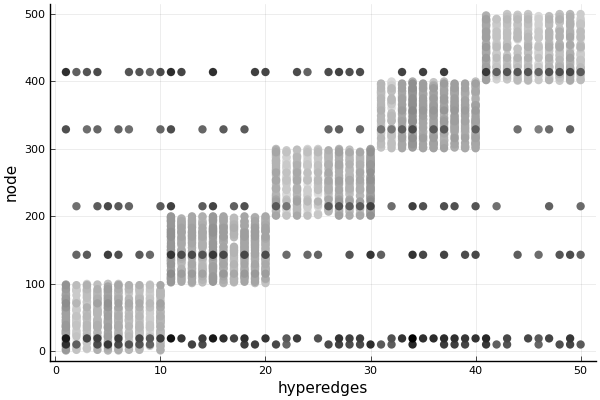

In [380]:
include("./CreateHypergraph.jl")
include("./ClusteringUtil.jl")
# 1clusterのnode number
a = [100 for i in 1:5]
# 1clusterのhe number
b = [10 for i in 1:5]

rg, noise, tr_data = create_hypergraph(a, b, 0.5, 0.02)
plot_incidence(rg1)


In [43]:
# get_connected_components(rg)
h2txt(rg, "rg4.txt")
# include("./HypergraphClustering.jl")
# @time ms, ph, bp, ufh = clustering3(rg)
# Plots.plot(ms)

In [384]:
# ms, ph, bp, ufh = clustering3(rg1, 1)
gethyperedges(rg1, 19)
# bp

Dict{Int64,Int64} with 36 entries:
  18 => 1
  33 => 1
  41 => 1
  32 => 1
  47 => 1
  40 => 1
  16 => 1
  11 => 1
  39 => 1
  46 => 1
  43 => 1
  9  => 1
  25 => 1
  10 => 1
  34 => 1
  29 => 1
  35 => 1
  17 => 1
  8  => 1
  22 => 1
  6  => 1
  49 => 1
  4  => 1
  37 => 1
  3  => 1
  ⋮  => ⋮

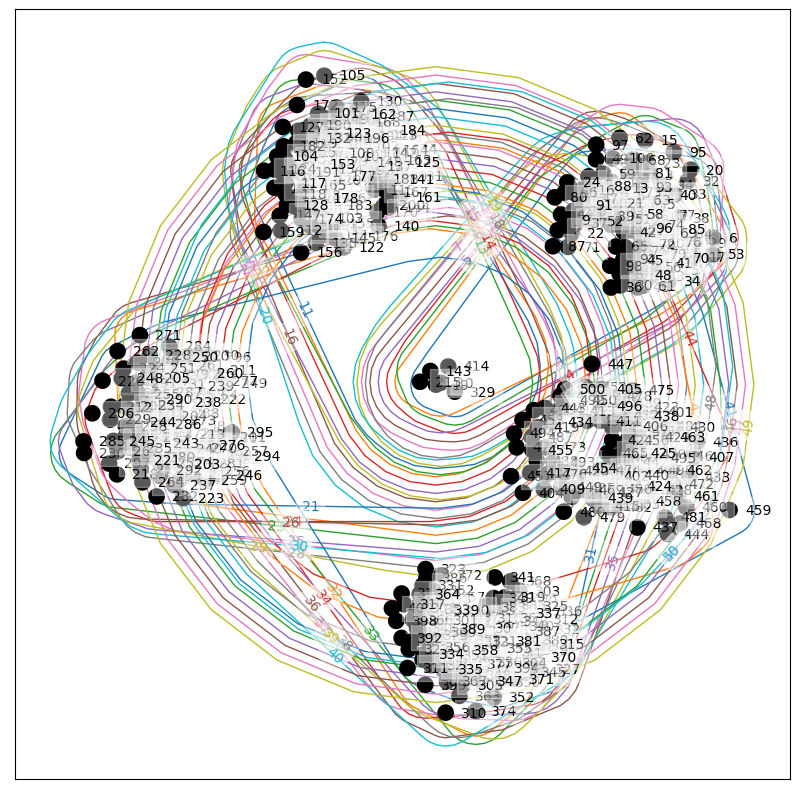

In [378]:
pyplot()
SimpleHypergraphs.draw(rg1, HyperNetX, layout_kwargs=Dict(["seed"=>0]))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  1.701424 seconds (4.54 M allocations: 354.409 MiB, 25.07% gc time)


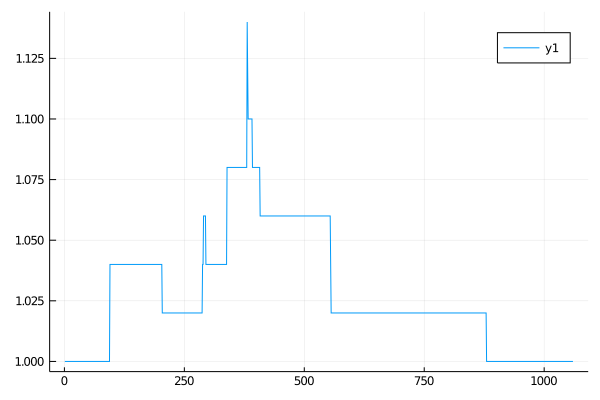

In [67]:
include("./HypergraphClustering.jl")
@time ms, ph, bp, ufh = he_clustering(rg, 5)

Plots.plot(ms)

In [68]:
ph[end]
# arr = []
# p = epart2cluster(youtube, eph[bcn])
# @showprogress 1 "computing..." for i in 1:nhv(youtube)
#     count = 0
#     for j in p
#         if i in j count += 1 end
#     end
#     push!(arr, count)
# end


5-element Array{Set{Int64},1}:
 Set([512, 515, 517, 513, 518, 511, 520, 514, 516, 519])
 Set([536, 538, 532, 535, 531, 537, 540, 533, 534, 539])
 Set([529, 524, 522, 528, 521, 527, 523, 525, 526, 530])
 Set([543, 549, 542, 546, 545, 544, 548, 547, 550, 541])
 Set([510, 502, 505, 504, 506, 509, 501, 507, 503, 508])

In [69]:
prob = calc_entropy(rg, ufh, epart2cluster(rg, ph[end]))
for (k,v) in prob
    if !(1 in v)
        println(k, ' ', v)
    end
end

215 [0.22835566917800224, 0.24577313236912657, 0.4413615325146928, 0.0, 0.08450966593817838]
165 [0.3608302269869191, 0.31924965248639153, 0.2587589753864303, 0.0, 0.06116114514025914]
117 [0.38960268733746056, 0.3366297474474801, 0.2737675652150594, 0.0, 0.0]
188 [0.3186768022496416, 0.1649243747067747, 0.2533493188565206, 0.263049504187063, 0.0]
495 [0.5931081876204077, 0.0, 0.0, 0.40689181237959227, 0.0]
475 [0.1516026021091485, 0.19488155972714724, 0.1930116566887829, 0.4605041814749215, 0.0]
320 [0.17528596196461033, 0.34306067832582354, 0.245699420837859, 0.17801982458520632, 0.05793411428650088]
360 [0.26462377390077413, 0.4141808283788302, 0.3211953977203957, 0.0, 0.0]
166 [0.6036082218620025, 0.0, 0.39639177813799753, 0.0, 0.0]
35 [0.24236537376679723, 0.26945316451142165, 0.2202974346967684, 0.1760538218544942, 0.09183020517051858]
431 [0.23544325257691712, 0.19710068651653664, 0.28190351019542736, 0.2855525507111189, 0.0]
341 [0.13170059669509343, 0.3663600755047017, 0.22704

In [70]:
epart2cluster(rg, ph[end])

5-element Array{Set{Int64},1}:
 Set([197, 158, 134, 136, 215, 160, 151, 131, 144, 142  …  341, 186, 119, 191, 156, 177, 116, 123, 163, 164, 108])
 Set([329, 306, 370, 215, 365, 391, 400, 342, 384, 375  …  321, 378, 389, 312, 317, 358, 305, 315, 322, 349, 301])
 Set([288, 241, 215, 249, 207, 300, 289, 201, 283, 285  …  291, 341, 268, 281, 243, 222, 277, 271, 255, 218, 276])
 Set([491, 464, 478, 499, 477, 435, 494, 448, 490, 407  …  341, 420, 454, 423, 424, 427, 446, 485, 498, 496, 405])
 Set([2, 89, 11, 215, 29, 74, 57, 78, 31, 70  …  98, 19, 51, 22, 6, 24, 73, 53, 23, 27, 56])                      

In [129]:
arr2 = []
count = 0
for i in p
#     if length(i) > 1 push!(arr2, length(i)) end
#     if length(i) == 2 count += 1 end
end
sort!(arr2, rev=true)

for i in 1:nhe(youtube)
    if length(getvertices(youtube, i)) == 2 count += 1 end
end



Set([543, 549, 542, 546, 545, 544, 548, 547, 550, 541])
Set([536, 538, 532, 535, 531, 537, 540, 533, 534, 539])
Set([510, 502, 505, 504, 506, 509, 501, 507, 503, 508])
Set([512, 515, 517, 513, 518, 511, 520, 514, 516, 519])
Set([529, 524, 522, 528, 521, 527, 523, 525, 526, 530])


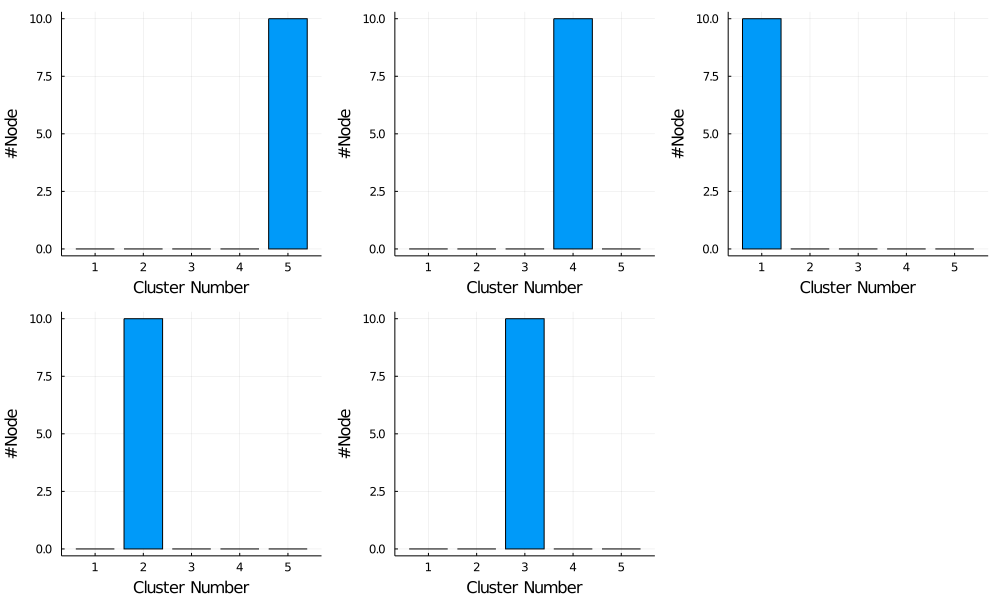

In [129]:
arr = []
for i in ep
    dict = Dict([i=>0 for i in 1:5])
    println(i)
    for j in i
        j -= nhv(rg1)
#         if j == 50 dict[4] += 1 
        dict[Int(ceil(j/10))] += 1 
    end
# #     println(dict)
    b = Plots.bar(dict, ylabel="#Node", xlabel="Cluster Number", label="")
    push!(arr, b)
end

Plots.plot(arr..., size=(1000, 600))


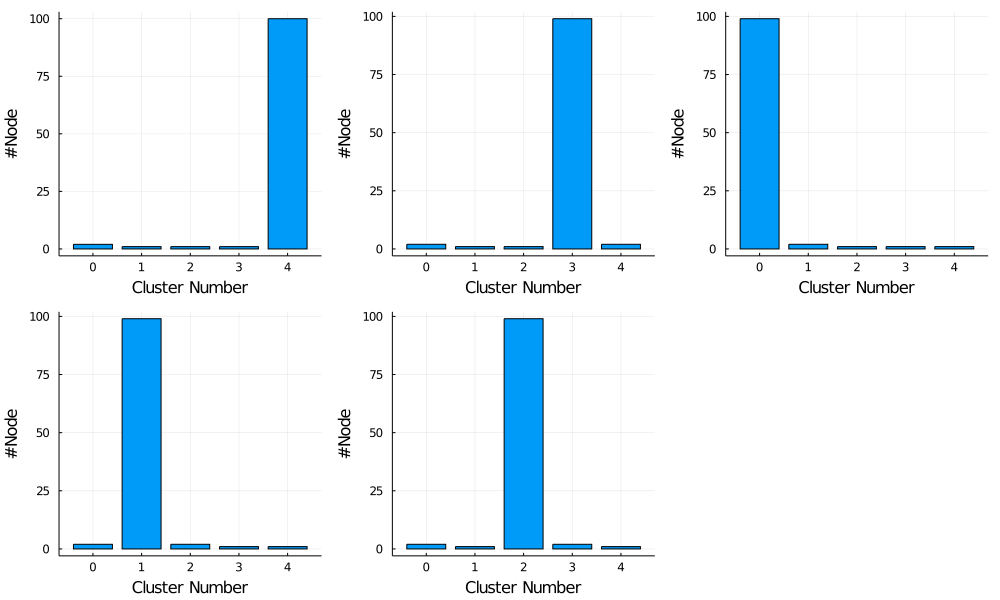

In [110]:
arr = []
for i in p
    dict = Dict([i=>0 for i in 0:4])
    for j in i
        if j == 500 dict[4] += 1 
        else dict[Int(floor(j/100))] += 1 end
    end
# #     println(dict)
    b = Plots.bar(dict, ylabel="#Node", xlabel="Cluster Number", label="")
    push!(arr, b)
end

Plots.plot(arr..., size=(1000, 600))


In [129]:
include("./ClusteringUtil.jl")
noise_node = [true in i for i in noise]
edges = build_bg(rg, tfidf)
order = noise_order(edges, noise)
tmp = [noise_node[i.from] ? 1 : 0 for i in edges]
[i[1] for i in enumerate(noise_node)][noise_node .== 1]
# Plots.plot(tmp)
# Plots.plot(order, xlabel="#noise node", ylabel="#order")

6-element Array{Int64,1}:
  10
  19
 143
 215
 329
 414

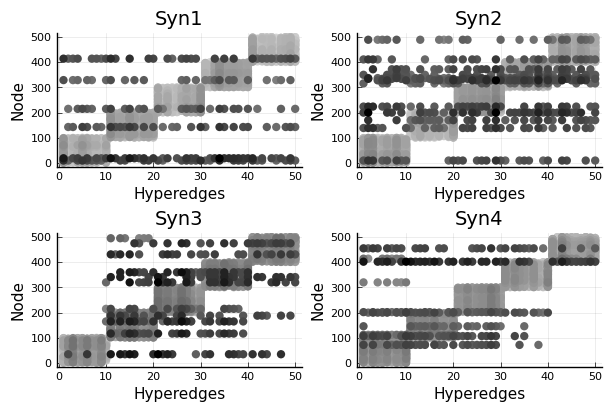

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [186]:
include("./ClusteringUtil.jl")
p_arr = []
for (i, rg) in enumerate([rg1, rg2, rg3, rg4])
    push!(p_arr, plot_incidence(rg, "Syn$i", tfidf))
end

Plots.plot(p_arr...)
Plots.savefig("./data/iiWAS2020/incidence_mats.eps")

In [104]:
ceph = load("cookpad_heclus.jld2")["eph"]

Error encountered while loading "/home/C0117035/hypergraph-clustering/jl/cookpad_heclus.jld2".

Fatal error:


InterruptException: InterruptException:

In [43]:
include("./ClusteringUtil.jl")
# params = Dict("k1"=> 2.0, "b"=>0.75)
arr = []
for b in 0:0.5:1.0
    params = Dict("k1"=>2.0, "b"=>b)
    ms, ph, bp, ufh, scores = clustering3(rg1, 1, my_mod, okapi, params, freq=100)
    push!(arr, ms)
    params = Dict("k1"=>1.2, "b"=>b)
    ms, ph, bp, ufh, scores = clustering3(rg1, 1, my_mod, okapi, params, freq=100)
    push!(arr, ms)
end    

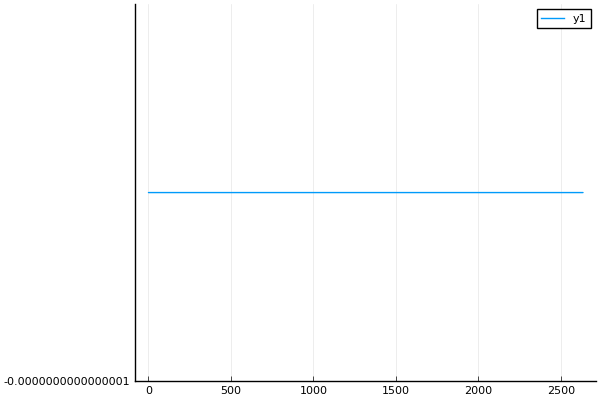

In [154]:
Plots.plot(load("./youtube_okapis.jld2")["arr"][2])

In [80]:
include("./ClusteringUtil.jl")
p_arr = []
push!(p_arr, plot_incidence(rg2, "IDF", idf))
push!(p_arr, plot_incidence(rg2, "TF", tf))
push!(p_arr, plot_incidence(rg2, "TF-IDF", tfidf))
push!(p_arr, plot_incidence(rg2, "Random", random_weight))
push!(p_arr, plot_incidence(rg2, "Okapi", okapi, Dict("k1"=>2.0, "b"=>0.75)))

# Plots.plot(p_arr..., size=(1500, 600))

5-element Array{Any,1}:
 Plot{Plots.PyPlotBackend() n=1}
 Plot{Plots.PyPlotBackend() n=1}
 Plot{Plots.PyPlotBackend() n=1}
 Plot{Plots.PyPlotBackend() n=1}
 Plot{Plots.PyPlotBackend() n=1}

InterruptException: InterruptException:

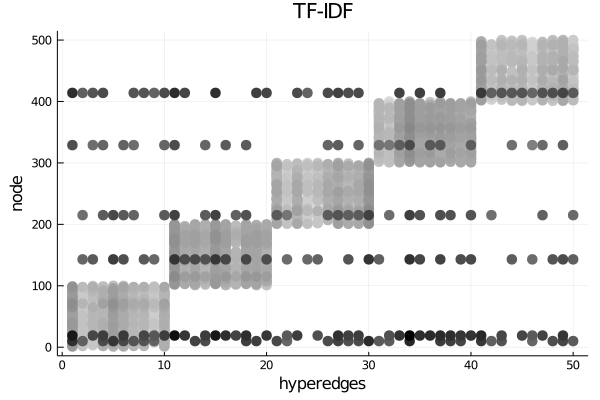

In [50]:
include("./ClusteringUtil.jl")
plot_incidence(rg1, "TF-IDF", tfidf)

In [44]:
include("./HypergraphClustering.jl")
include("./ClusteringUtil.jl")
@time ms, phist, ephist, bcn = clustering3(rg1)

  0.842290 seconds (2.49 M allocations: 122.834 MiB)


(Any[-2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84  …  -1.5184287996366633e-34, -1.5184287996366633e-34, -1.5184287996366633e-34, -1.5184287996366633e-34, -1.5184287996366633e-34, -1.5184287996366633e-34, -1.5184287996366633e-34, -1.5184287996366633e-34, -1.5184287996366633e-34, -1.5184287996366633e-34], Any[Set{Int64}[Set([288]), Set([306]), Set([11]), Set([491]), Set([134]), Set([158]), Set([160]), Set([215]), Set([464]), Set([29])  …  Set([23]), Set([498]), Set([305]), Set([315]), Set([322]), Set([349]), Set([27]), Set([496]), Set([218]), Set([56])], Set{Int64}[Set([288]), Set([306]), Set([11]), Set([491]), Set([134]), Set([158]), Set([160]), Set([215]), Set([464]), Set([29])  …  Set([23]), Set([498]), Set([305]), Set([315]), Set([322]), Set([349]), Set([27]), Set([496]), Set([218]), Set([56])

147.245941 seconds (699.04 M allocations: 84.625 GiB, 10.88% gc time)


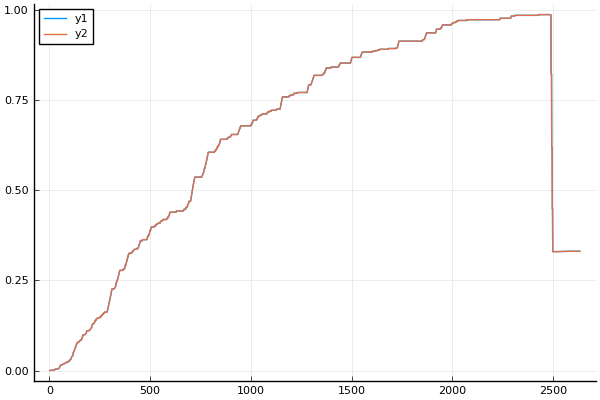

In [40]:
# scores = []
@time push!(scores,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))

Plots.plot(scores)

6-element Array{Set{Int64},1}:
 Set([543, 549, 542, 546, 545, 544, 548, 547, 550, 541])
 Set([510, 502, 505, 504, 506, 509, 501, 507, 503, 508])
 Set([512, 515, 517, 513, 518, 511, 520, 514, 516, 519])
 Set([529, 524, 522, 528, 521, 527, 523, 525, 526, 530])
 Set([536, 538, 532, 535, 531, 537, 540, 533, 539])     
 Set([534])                                             

In [130]:
# @time push!(scores,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))
# pyplot()
Plots.plot(scores, label=["TFIDF" "TF" "Random" "Okapi" "IDF"], lw=5, xlabel="#added edges", ylabel="f1 measure", title="F1 measures")

UndefVarError: UndefVarError: scores not defined

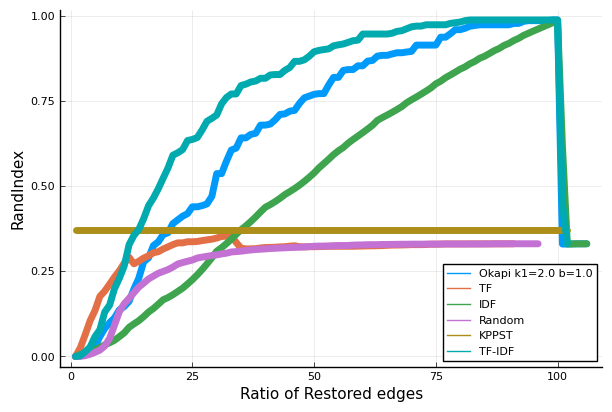

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [226]:
rg1_ms = load("./rg1_ms.jld2")["ms_hists"]
push!(rg1_ms, [0.37 for i in 1:length(rg1_ms[1])])

# Int(floor(length(rg1_ms[1])/100))
f(x) = x[1:25:end]
rg1_ms = f.(rg1_ms)
tmp = copy(rg1_ms[1])
rg1_ms = rg1_ms[2:end]
push!(rg1_ms, tmp)
Plots.plot(rg1_ms, label=["Okapi k1=2.0 b=1.0" "TF" "IDF" "Random" "KPPST" "TF-IDF"], lw=5, xlabel="Ratio of Restored edges", ylabel="RandIndex")
Plots.savefig("./data/iiWAS2020/rg1_randIndex.eps")

In [342]:
include("./HypergraphClustering.jl")
include("./ClusteringUtil.jl")
# scores2 = []
# for rg in [rg1, rg2, rg3, rg4]
# # for rg in [rg4]
#     ms, ph, bp, uf = clustering3(rg, 1)
#     push!(scores2,scoring.(ph, Ref(tr_data), Ref(f1_score)))
# end
@showprogress for rg in [rg1, rg2, rg3, rg4]
    cfm = CFModularityCNMLike(1000)
    bm,bp,hist = findcommunities(rg, cfm)
    println(bp[1])
    score = scoring(bp,tr_data, f1_score)
    scores = [score for i in 1:length(scores2[1])]
    push!(scores2, scores)
end
# scores2 = scores2[1:4]
scores2

Set([288, 306, 29, 300, 289, 74, 176, 57, 285, 318, 252, 96, 354, 49, 117, 284, 227, 188, 195, 157, 264, 353, 221, 153, 79, 71, 154, 390, 184, 107, 169, 10, 294, 162, 129, 88, 240, 261, 149, 5, 63, 41, 245, 15, 148, 210, 66, 150, 209, 95, 236, 111, 90, 14, 396, 175, 256, 200, 308, 135, 125, 172, 146, 130, 314, 37, 394, 110, 309, 99, 141, 216, 1, 30, 47, 366, 214, 91, 128, 9, 147, 244, 348, 183, 103, 345, 152, 140, 378, 51, 191, 177, 123, 312, 358, 276, 241, 370, 197, 365, 142, 78, 372, 182, 279, 368, 138, 292, 235, 94, 290, 115, 40, 373, 171, 334, 178, 313, 113, 293, 12, 343, 246, 297, 364, 393, 274, 262, 92, 28, 338, 97, 377, 124, 267, 360, 39, 85, 25, 181, 58, 8, 333, 356, 254, 185, 20, 194, 52, 233, 266, 234, 367, 166, 278, 397, 35, 336, 64, 286, 257, 220, 145, 392, 346, 86, 67, 126, 229, 190, 303, 82, 7, 75, 228, 237, 87, 386, 179, 395, 325, 347, 340, 98, 399, 174, 319, 371, 161, 389, 22, 73, 24, 119, 222, 156, 116, 53, 305, 349, 27, 56, 11, 134, 215, 158, 160, 131, 391, 249, 207, 

Progress:  25%|██████████▎                              |  ETA: 0:00:04

Set([288, 11, 134, 158, 160, 29, 131, 300, 173, 74, 477, 176, 57, 31, 285, 70, 33, 479, 445, 165, 114, 96, 133, 328, 473, 49, 84, 489, 117, 93, 425, 50, 77, 80, 474, 248, 227, 188, 441, 132, 195, 157, 231, 221, 153, 79, 71, 120, 154, 184, 224, 76, 167, 213, 204, 122, 143, 414, 62, 107, 287, 169, 21, 484, 416, 10, 180, 294, 102, 162, 129, 240, 88, 261, 149, 5, 63, 438, 41, 245, 15, 148, 495, 55, 66, 239, 155, 150, 209, 296, 95, 139, 90, 111, 14, 200, 269, 135, 125, 172, 146, 130, 17, 65, 202, 250, 44, 37, 419, 192, 436, 110, 127, 13, 99, 137, 141, 105, 1, 30, 47, 91, 128, 9, 203, 43, 147, 104, 273, 183, 103, 152, 38, 118, 488, 465, 48, 100, 411, 81, 140, 291, 196, 268, 19, 281, 51, 191, 177, 277, 123, 255, 424, 446, 163, 405, 164, 108, 2, 89, 241, 197, 136, 151, 144, 142, 283, 78, 159, 448, 112, 372, 106, 459, 121, 109, 182, 26, 279, 298, 350, 138, 4, 235, 168, 440, 94, 290, 115, 54, 418, 40, 101, 171, 337, 60, 34, 417, 334, 299, 467, 178, 426, 238, 198, 493, 113, 293, 295, 12, 242, 189

Progress:  50%|████████████████████▌                    |  ETA: 0:00:03

Set([306, 29, 74, 435, 176, 57, 318, 445, 96, 354, 49, 489, 117, 474, 188, 195, 157, 353, 430, 153, 79, 71, 154, 390, 184, 484, 107, 169, 10, 162, 129, 88, 149, 439, 5, 63, 41, 15, 148, 495, 66, 150, 95, 90, 111, 14, 396, 175, 200, 308, 135, 172, 314, 146, 130, 125, 37, 394, 453, 419, 110, 450, 309, 99, 141, 1, 30, 47, 366, 91, 128, 9, 147, 348, 183, 103, 345, 152, 488, 140, 378, 51, 454, 191, 177, 123, 312, 427, 446, 358, 370, 197, 365, 142, 78, 372, 407, 433, 182, 368, 138, 94, 115, 418, 40, 373, 171, 334, 178, 426, 313, 113, 12, 343, 410, 364, 393, 456, 497, 92, 28, 338, 97, 377, 124, 360, 39, 85, 25, 181, 58, 8, 333, 428, 356, 185, 20, 194, 52, 421, 451, 367, 166, 397, 35, 336, 64, 408, 145, 392, 346, 86, 67, 126, 190, 303, 82, 7, 75, 87, 386, 179, 395, 325, 347, 340, 402, 98, 399, 174, 319, 371, 161, 389, 22, 24, 119, 73, 156, 116, 53, 498, 305, 349, 496, 27, 56, 11, 491, 134, 215, 158, 160, 464, 131, 391, 478, 384, 173, 499, 477, 31, 490, 70, 335, 33, 479, 165, 114, 133, 328, 473

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:02

Set([11, 491, 134, 158, 464, 160, 29, 131, 249, 478, 173, 201, 74, 477, 435, 176, 57, 31, 285, 490, 70, 33, 479, 445, 114, 165, 96, 133, 473, 49, 84, 489, 230, 117, 93, 425, 284, 50, 474, 80, 77, 248, 188, 132, 195, 157, 412, 231, 430, 153, 217, 79, 71, 120, 154, 225, 76, 184, 167, 213, 204, 122, 143, 414, 62, 107, 169, 21, 416, 102, 180, 10, 162, 129, 260, 429, 88, 251, 149, 5, 463, 63, 41, 15, 148, 210, 55, 66, 462, 239, 155, 150, 209, 296, 95, 139, 111, 90, 14, 483, 253, 205, 175, 212, 200, 269, 282, 135, 172, 492, 146, 130, 125, 17, 65, 202, 44, 37, 192, 110, 127, 475, 13, 450, 99, 137, 141, 105, 1, 30, 47, 226, 214, 91, 128, 9, 203, 470, 147, 43, 104, 244, 183, 320, 103, 152, 38, 465, 118, 48, 100, 411, 81, 140, 291, 196, 19, 51, 454, 191, 177, 277, 123, 446, 427, 485, 163, 276, 108, 164, 2, 89, 197, 136, 151, 144, 142, 283, 78, 159, 112, 407, 459, 106, 433, 121, 109, 182, 26, 138, 4, 292, 457, 235, 168, 94, 115, 54, 40, 101, 455, 171, 60, 34, 299, 467, 178, 426, 198, 238, 272, 11

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


8-element Array{Any,1}:
 [0.0, 8.080481596703163e-5, 8.080481596703163e-5, 8.080481596703163e-5, 0.00016160310277957336, 0.00016160310277957336, 0.00024239486122894192, 0.00040395879620278735, 0.0006462557557153244, 0.0006462557557153244  …  0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.3311036789297659]
 [0.0, 0.0, 0.0, 8.080481596703163e-5, 0.00024239486122894192, 0.00024239486122894192, 0.0004847309743092584, 0.0004847309743092584, 0.0005654966272165448, 0.0007270083605961468  …  0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366, 0.33088368534439366]                                   
 [0.0, 0.0, 8.080481596703163e-5, 0.00024239486122894192, 0.0004847309743092584, 0.0008077544426494346, 0.0012113870381586

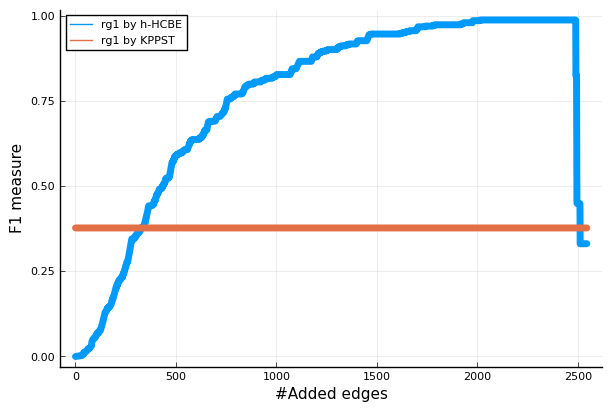

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [347]:
# scores2
score = []
push!(score, scores2[1])
push!(score, scores2[5])
pyplot()
Plots.plot(score, label=["rg1 by h-HCBE" "rg1 by KPPST"], lw=5, xlabel="#Added edges", ylabel="F1 measure")
Plots.savefig("./data/kbs2020/F1-measures.eps")

In [390]:
# ms, ph, bp, ufh = clustering3(rg1, 11)
cfm = CFModularityCNMLike(1000)
a,bp,hist = findcommunities(rg1, cfm)
colors = ["red" "blue" "yellow" "green" "brown" "cyan" "magenta" "pink" "white" "gray"]
ec = ["gray" for i in nhe(rg1)]
sort!(bp, rev=true, by=i->length(i))
c = ["" for i in 1:nhv(rg1)]

for (i, node) in enumerate(bp)
    for j in node
        if length(node) == 1 c[j] = "black" else c[j] = colors[i] end
    end
end


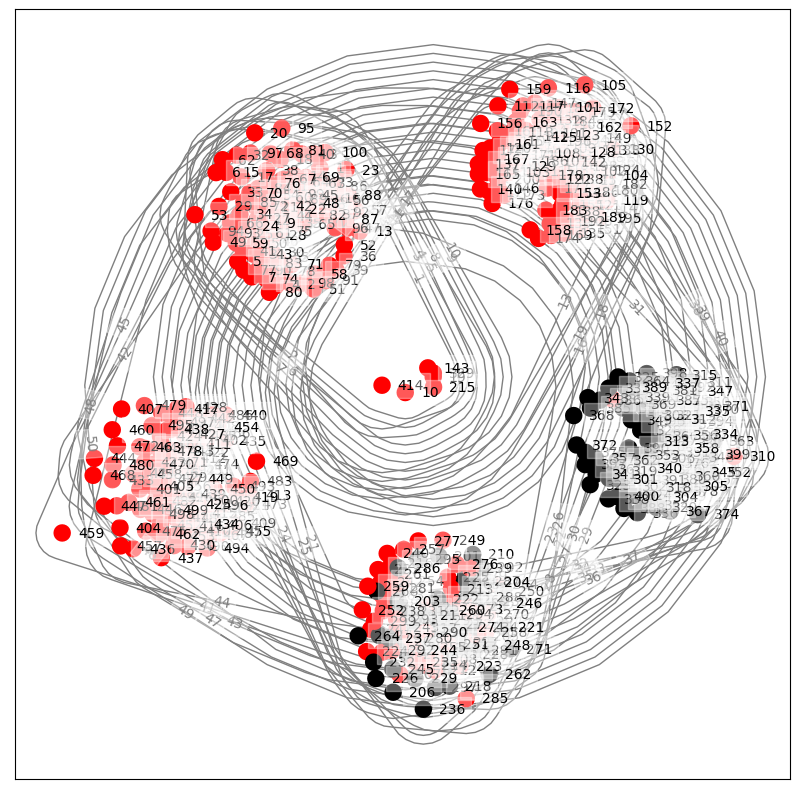

In [391]:
SimpleHypergraphs.draw(rg1, HyperNetX, nodes_kwargs=Dict(["facecolors"=>c]), edges_kwargs=Dict(["edgecolors"=>ec]),layout_kwargs=Dict(["seed"=>0]))
# ms, ph, bp, ufh = clustering3(rg1, 11)
# h = []
# push!(h, length.(ph[end]))
# Plots.histogram(length.(ph[end]), bins=10, xlabel="Cluster size", ylabel="#Clusters", label="")
# Plots.savefig("./data/kbs2020/hcbebest_sizehist.eps")
# ms, ph, bp, ufh = clustering3(rg1, 1)
# Plots.histogram(length.(ph[end]), bins=10, xlabel="Cluster size", ylabel="#Clusters", label="")
# Plots.savefig("./data/kbs2020/hcbemod_sizehist.eps")
# push!(h, length.(bp))
# cfm = CFModularityCNMLike(1000)
# bm, bp, hist = findcommunities(rg1, cfm)
# push!(h,length.(bp))
# Plots.histogram(length.(bp), bins=10, xlabel="Cluster size", ylabel="#Clusters", label="")
# Plots.savefig("./data/kbs2020/kppst_sizehist.eps")
# ms, eph, bcn, uf = he_clustering(rg1, 5)
# bp = epart2cluster(rg1, eph[end])
# push!(h, length.(bp))
# Plots.histogram(length.(bp), bins=10, xlabel="Cluster size", ylabel="#Clusters", label="")
# Plots.savefig("./data/kbs2020/shcbe_sizehist.eps")

# Plots.histogram(h, bins=10, xlabel="Cluster size", ylabel="#Clusters", alpha=0.5)


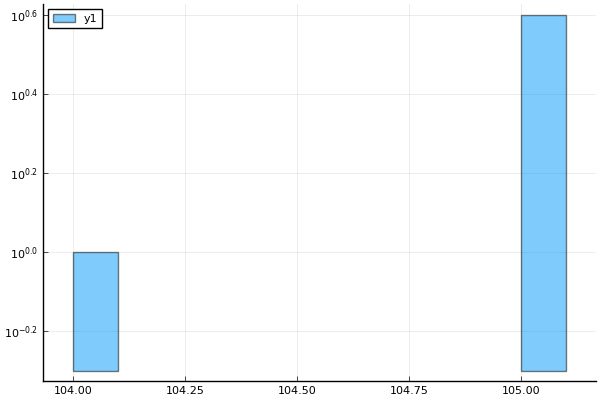

In [363]:
Plots.histogram(h[4], alpha=0.5, yscale=:log10, bins=10)

In [264]:
include("./HypergraphClustering.jl")
# ms, eph, bcn, uf = he_clustering(youtube, 100, freq=100)
# bp = []
# for i in youtube_data["eph"]
#     if length(i) <= 100
#         bp = i
#         break
#     end
# end

# bp = epart2cluster(youtube, sort(bp, rev=true, by=i->length(i)))
# sort!(bp, rev=true, by=i->length(i))
# prob_dists = calc_entropy(youtube, uf, bp)

l = []
for i in 1:nhv(youtube)
    push!(l, (i, avg_entropy(prob_dists[i])))
end
sort(l, rev=true, by=i->i[2])

45352-element Array{Any,1}:
 (10979, 0.23752480651633215)
 (15062, 0.23752480651633215)
 (22785, 0.23752480651633215)
 (11718, 0.16779384058972535)
 (6387, 0.15169103392447342) 
 (10682, 0.15169103392447342)
 (650, 0.1515587551567803)   
 (1256, 0.1515587551567803)  
 (1285, 0.1515587551567803)  
 (2530, 0.1515587551567803)  
 (3254, 0.1515587551567803)  
 (4048, 0.1515587551567803)  
 (4088, 0.1515587551567803)  
 ⋮                           
 (45338, 0)                  
 (45339, 0)                  
 (45340, 0)                  
 (45341, 0)                  
 (45342, 0)                  
 (45345, 0)                  
 (45346, 0)                  
 (45347, 0)                  
 (45348, 0)                  
 (45349, 0)                  
 (45351, 0)                  
 (45352, 0)                  

In [275]:
sort(prob_dists[22785], rev=true)

95-element Array{Float64,1}:
 0.401584447352294  
 0.34416348667990915
 0.2542520659677969 
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 ⋮                  
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                

In [43]:
include("./HypergraphClustering.jl")
# act_sc = part2is_samecluster(tr_data)
# pred_sc = part2is_samecluster(part)
# jl_sc = part2is_samecluster(bp)
# jl_fscore = f1_score(act_sc, jl_sc)
# jl_acc = accuracy_score(act_sc, jl_sc)
# fscore = f1_score(act_sc, pred_sc)
# acc = accuracy_score(act_sc, pred_sc)



@time arr1, arr2 = h2correlation(rg, tfidf, general_weight)
using StatsBase
# スピアマン ケンドール
StatsBase.corspearman(arr1, arr2), StatsBase.corkendall(arr1, arr2)

  0.536300 seconds (963.25 k allocations: 54.130 MiB, 4.78% gc time)


(0.6503325997278955, 0.49466836458129115)

In [192]:
max_jsa

UndefVarError: UndefVarError: jsai_max not defined

In [64]:
ϕₛ = []
for subset in part
    ϕ = conductance(rg, subset)
    if !isnan(ϕ) append!(ϕₛ, (ϕ, subset)); end
#     println(conductance(rg, subset))
end

In [244]:
include("./ClusteringUtil.jl")
cs = []
plot_names = []
indicator_names = ["Okapi k1=2.0 b=1.0" "TF" "IDF" "Random" "TF-IDF"]
indicators = [okapi, tf, idf, random_weight]
p = 1
for i in 1:4
        name1 = indicator_names[i]
        ind1 = indicators[i]
        push!(cs, curve(rg1, tfidf, ind1))
#         plot_names[p] = "$name1 $name2"
#         p += 1
#         push!(plot_names, "$name1 $name2")

end
    

computing...100%|███████████████████████████████████████| Time: 0:00:02
computing...100%|███████████████████████████████████████| Time: 0:00:02
computing...100%|███████████████████████████████████████| Time: 0:00:02
computing...100%|███████████████████████████████████████| Time: 0:00:02


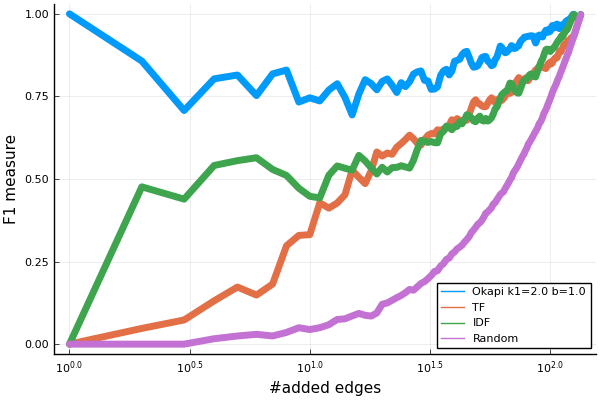

In [246]:
pyplot()
f(x) = x[1:20:end]
tmp = f.(cs)
Plots.plot(tmp, label=(indicator_names), xlabel="#added edges", ylabel="F1 measure", lw=5, xscale=:log10)
# Plots.savefig("./images/jaccard_curve.eps")

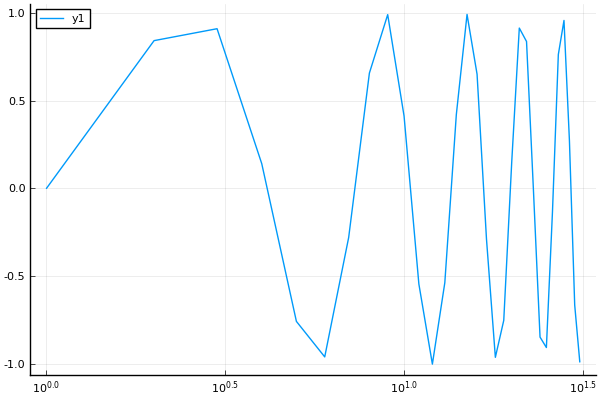

In [266]:
Plots.plot(sin.(0:0.1:30)[1:10:end], xscale=:log10)

In [76]:
include("./HypergraphClustering.jl")
@time uf, part_hist, order = d_clustering(rg1)
length(part_hist)

computing...  1%|▌                                      |  ETA: 0:04:28

  5.232653 seconds (12.36 M allocations: 1.013 GiB, 66.87% gc time)


2375

In [65]:
# scores = []
# @time push!(scores,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))

# Plots.plot(scores)

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/C0117035/.julia/packages/PyCall/zqDXB/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('Found input variables with inconsistent numbers of samples: [0, 124750]',)
  File "/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py", line 1047, in f1_score
    zero_division=zero_division)
  File "/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py", line 1175, in fbeta_score
    zero_division=zero_division)
  File "/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py", line 1434, in precision_recall_fscore_support
    pos_label)
  File "/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py", line 1250, in _check_set_wise_labels
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py", line 81, in _check_targets
    check_consistent_length(y_true, y_pred)
  File "/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py", line 257, in check_consistent_length
    " samples: %r" % [int(l) for l in lengths])


In [82]:
include("./HypergraphClustering.jl")
@time clustering4(rg1)
# length(part_hist)

  0.746382 seconds (1.53 M allocations: 77.796 MiB, 7.88% gc time)


1-element Array{Set{Int64},1}:
 Set([288, 306, 29, 300, 289, 74, 435, 176, 57, 285  …  341, 186, 321, 420, 6, 423, 271, 23, 315, 322, 218])

155.259351 seconds (629.95 M allocations: 76.287 GiB, 16.58% gc time)


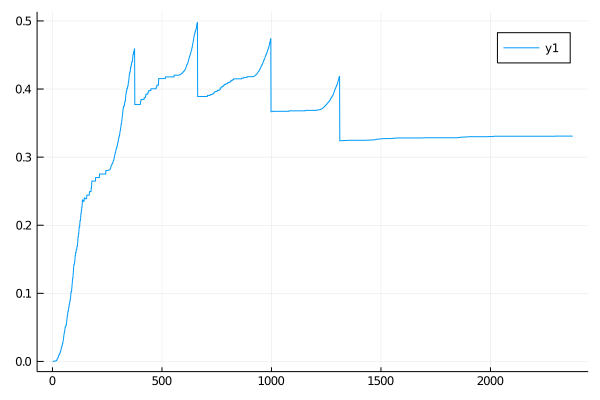

In [32]:
scores = []
@time push!(scores,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))

Plots.plot(scores)

In [37]:
include("HypergraphClustering.jl")
# @time build_bg(cookpad)
@time arr1, arr2 = h2correlation(rg, tfidf, general_weight)
# @time arr1, arr2 = h2correlation(cookpad)

  0.687074 seconds (1.15 M allocations: 69.093 MiB, 2.98% gc time)


([1429, 3897, 3267, 3300, 3596, 4015, 3372, 298, 1734, 3410  …  4633, 7932, 7323, 7602, 7322, 9167, 7931, 9502, 7505, 6765], [2773, 11555, 5583, 6453, 9713, 11867, 8215, 615, 2593, 3865  …  3042, 7332, 5585, 6745, 5584, 9108, 7331, 10018, 6454, 4430])

In [41]:
using StatsBase
# スピアマン ケンドール
corspearman(arr1, arr2), corkendall(arr1, arr2)

(0.7546161791462117, 0.585661867767498)

In [56]:
scores = []
@time push!(scores,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))

Plots.plot(scores)

500×22 Hypergraph{Int64,Nothing,Nothing,Dict{Int64,Int64}}:
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  1       
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing   nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing   nothing
 nothing  nothing  nothing  

In [103]:
include("./CreateHypergraph.jl")
h = build_sample()

6×9 Hypergraph{Float64,Int64,String,Dict{Int64,Float64}}:
 1.0       1.0        nothing  1.0       …   nothing   nothing   nothing
 1.0       1.0       1.0        nothing      nothing   nothing   nothing
 1.0        nothing  1.0       1.0          1.0       1.0       1.0     
  nothing   nothing   nothing   nothing     1.0        nothing  1.0     
  nothing   nothing   nothing   nothing     1.0       1.0        nothing
  nothing   nothing   nothing   nothing  …   nothing  1.0       1.0     

In [203]:
include("./CreateHypergraph.jl")
# h = build_sample()
# SimpleHypergraphs.draw(rg1, HyperNetX;)

build_sample (generic function with 1 method)

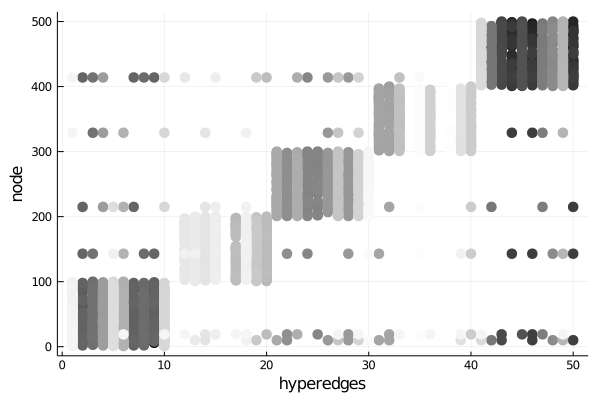

In [86]:
include("./ClusteringUtil.jl")
plot_incidence2(rg1, order)

In [71]:
scoring(part_hist[375], tr_data, f1_score)

0.45889615549171814

In [26]:
youtube10 = load("./data/kbs2020/youtube-10-res.jld2")

Dict{String,Any} with 5 entries:
  "eph" => Any[Set{Int64}[Set([45353]), Set([45354]), Set([45355]), Set([45356]…
  "uf"  => UnionFind{Int64}([4069, 1093, 8028, 4069, 4069, 4069, 4069, 25643, 4…
  "ph"  => Any[Set{Int64}[Set([1]), Set([2]), Set([3]), Set([4]), Set([5]), Set…
  "ms"  => Any[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0.00729622, 0.00729622, 0.00729…
  "bcn" => 45352

In [6]:
cookpad_data = load("./cookpad_heclus.jld2")

Dict{String,Any} with 5 entries:
  "eph" => Any[Set{Int64}[Set([75875]), Set([75876]), Set([75877]), Set([75878]…
  "uf"  => UnionFind{Int64}([59774, 59774, 59774, 59774, 59774, 59774, 59774, 5…
  "ph"  => Any[Set{Int64}[Set([1]), Set([2]), Set([3]), Set([4]), Set([5]), Set…
  "ms"  => Any[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  "bcn" => 75827

In [11]:
tmp = []
for i in cookpad_data["eph"]
    if length(i) <= 10000
        global tmp = i
        break
    end
end

In [12]:
sort!(tmp, rev=true, by=i->length(i))

9986-element Array{Set{Int64},1}:
 Set([119533, 106975, 126457, 104394, 127038, 77654, 102882, 110924, 125317, 95032  …  105852, 86913, 127500, 97123, 79407, 77025, 107574, 109554, 84714, 93700, 130086])
 Set([113330, 102419, 100990, 122135])                                                                                                                                   
 Set([92057, 115636, 86042, 114560])                                                                                                                                     
 Set([84154, 103567, 107111])                                                                                                                                            
 Set([77183, 101942, 87653])                                                                                                                                             
 Set([125989, 113571, 86615])                                                                                       

In [14]:
length(tmp[1])

44636